## Lead Score Case Study
Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Importing Libraries

In [1]:
#Importing Libraries
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import f1_score,precision_score,recall_score

from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.set_option('display.max_columns',100)

### Data Inspection

In [2]:
#Reading the dataset
lead_score_df=pd.read_csv('Leads.csv')
lead_score_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
#Checking the columns and datatypes
lead_score_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
#Checking the dataset shape
lead_score_df.shape

(9240, 37)

In [5]:
#Describing the dataset
lead_score_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
#Checking for duplicates
lead_score_df.duplicated().sum()

0

### Data Cleaning

In [7]:
#Checking the unique values in each Categorical column
for cols in lead_score_df.select_dtypes(include=['object']).columns[2:]:
    print(cols.upper())
    print(lead_score_df[cols].unique())
    print('*'*100)

LEAD SOURCE
['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' nan 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']
****************************************************************************************************
DO NOT EMAIL
['No' 'Yes']
****************************************************************************************************
DO NOT CALL
['No' 'Yes']
****************************************************************************************************
LAST ACTIVITY
['Page Visited on Website' 'Email Opened' 'Unreachable'
 'Converted to Lead' 'Olark Chat Conversation' 'Email Bounced'
 'Email Link Clicked' 'Form Submitted on Website' 'Unsubscribed'
 'Had a Phone Conversation' 'View in browser link Clicked' nan
 'Approached upfront' 'SMS Sent' 'Visited Booth in Tradeshow'
 'Resubscribed to emai

In [8]:
# dropping categorical colums with only one value
lead_score_df.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content',
           'I agree to pay the amount through cheque'],axis=1,inplace=True)

In [9]:
#Replacing values of columns having 'select' has one of the category with nan
lead_score_df['Specialization'] = lead_score_df['Specialization'].replace('Select', np.nan)
lead_score_df['How did you hear about X Education'] = lead_score_df['How did you hear about X Education'].replace('Select', np.nan)
lead_score_df['Lead Profile'] = lead_score_df['Lead Profile'].replace('Select', np.nan)
lead_score_df['City'] = lead_score_df['City'].replace('Select', np.nan)

In [10]:
#Checking the Null value percentage in colums
round(lead_score_df.isna().sum().sort_values(ascending=False)/lead_score_df.shape[0]*100,2)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
A free cop

In [11]:
# dropping columns with NULL values >40%
cols=['How did you hear about X Education','Lead Profile','Lead Quality','Asymmetrique Activity Index',
      'Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Profile Index']
print('shape before dropping the columns', lead_score_df.shape)
lead_score_df=lead_score_df.drop(columns=cols)
print('shape after dropping the columns', lead_score_df.shape)

shape before dropping the columns (9240, 32)
shape after dropping the columns (9240, 25)


In [12]:
#Checking the Null value percentage in colums
round(lead_score_df.isna().sum().sort_values(ascending=False)/lead_score_df.shape[0]*100,2)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Newspaper Article                                 0.00
A free copy of Mastering The Interview            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
X Education Forums                                0.00
Prospect ID                                       0.00
Search                                            0.00
Lead Numbe

#### Column City

City
NaN                            39.707792
Mumbai                         34.870130
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: proportion, dtype: float64


<Figure size 200x200 with 0 Axes>

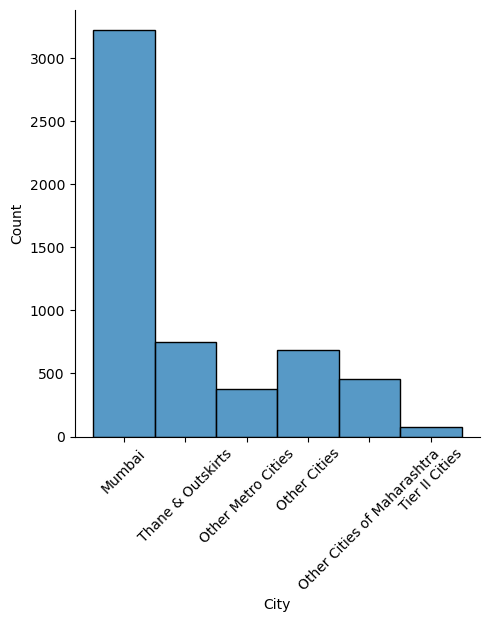

In [13]:
#Column City
# Checking the value counts for the column
cols='City'
print(lead_score_df[cols].value_counts(dropna=False,normalize=True)*100)
plt.figure(figsize=(2,2))
sns.displot(lead_score_df[cols])
plt.xticks(rotation=45)
plt.show()

In [14]:
# Creating a separate category level 'Others' for nan values 
lead_score_df[cols] = lead_score_df[cols].replace(np.nan,'Others')

#### Column Specialization

Specialization
NaN                                  36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: proportion, dtype: float64


<Figure size 2000x1000 with 0 Axes>

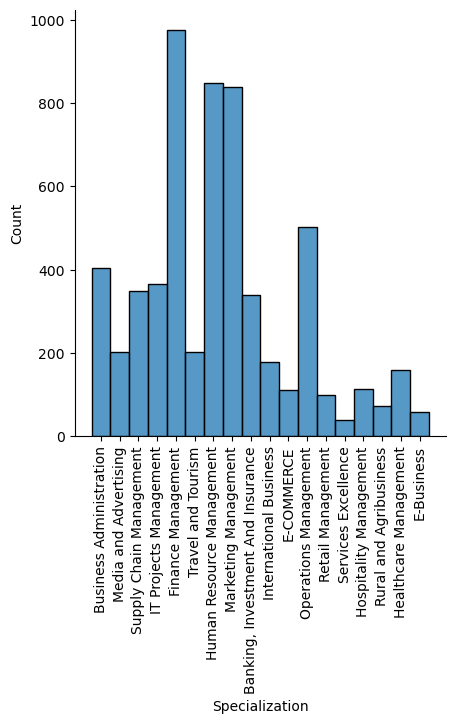

In [15]:
# Column Specialization
# Checking the value counts for the column
cols='Specialization'
print(lead_score_df[cols].value_counts(dropna=False,normalize=True)*100)

plt.figure(figsize=(20,10))
sns.displot(lead_score_df[cols])
plt.xticks(rotation=90)
plt.show()

Finance Management is the specialization with majority followed by Human Resources & Marketing , while Services Excellence is the lowest.

In [16]:
# Creating a separate category level 'Others' for nan values 
lead_score_df[cols] = lead_score_df[cols].replace(np.nan, 'Others')

In [17]:
# Grouping all low frequency values to Others 
lead_score_df['Specialization'] = lead_score_df['Specialization'].replace(['Hospitality Management','E-COMMERCE',
                                'Retail Management','Rural and Agribusiness','E-Business','Services Excellence'],
                                 'Others')
print(lead_score_df['Specialization'].value_counts(dropna=False,normalize=True)*100)

Specialization
Others                               41.948052
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Media and Advertising                 2.196970
Travel and Tourism                    2.196970
International Business                1.926407
Healthcare Management                 1.720779
Name: proportion, dtype: float64


#### Column Tags

In [18]:
# Column Tags
# Checking the value counts for the column 
cols='Tags'
print(lead_score_df[cols].value_counts(dropna=False,normalize=True)*100)

Tags
NaN                                                  36.287879
Will revert after reading the email                  22.424242
Ringing                                              13.019481
Interested in other courses                           5.551948
Already a student                                     5.032468
Closed by Horizzon                                    3.874459
switched off                                          2.597403
Busy                                                  2.012987
Lost to EINS                                          1.893939
Not doing further education                           1.569264
Interested  in full time MBA                          1.266234
Graduation in progress                                1.201299
invalid number                                        0.898268
Diploma holder (Not Eligible)                         0.681818
wrong number given                                    0.508658
opp hangup                                        

In [19]:
# Creating a separate category level 'Others' for nan values 
lead_score_df[cols] = lead_score_df[cols].replace(np.nan, 'Others')

In [20]:
# Grouping all low frequency values to Others 
lead_score_df['Tags'] = lead_score_df['Tags'].replace(['NaN','Interested  in full time MBA','Graduation in progress','invalid number','Diploma holder (Not Eligible)',
'wrong number given','opp hangup','number not provided','in touch with EINS','Lost to Others','Still Thinking',
'Want to take admission but has financial problems','In confusion whether part time or DLP','Interested in Next batch',
'Lateral student','Shall take in the next coming month','University not recognized','Recognition issue (DEC approval)'],
                                 'Others')
print(lead_score_df['Tags'].value_counts(dropna=False,normalize=True)*100)

Tags
Others                                 42.023810
Will revert after reading the email    22.424242
Ringing                                13.019481
Interested in other courses             5.551948
Already a student                       5.032468
Closed by Horizzon                      3.874459
switched off                            2.597403
Busy                                    2.012987
Lost to EINS                            1.893939
Not doing further education             1.569264
Name: proportion, dtype: float64


#### Column 'What matters most to you in choosing a course'

In [21]:
# Column 'What matters most to you in choosing a course'
# Checking the value counts for the column 
cols='What matters most to you in choosing a course'
print(lead_score_df[cols].value_counts(dropna=False,normalize=True)*100)

What matters most to you in choosing a course
Better Career Prospects      70.649351
NaN                          29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: proportion, dtype: float64


In [22]:
# Creating a separate category level 'Others' for nan values 
lead_score_df[cols] = lead_score_df[cols].replace(np.nan, 'Other')

#### Column 'What is your current occupation'

In [23]:
# Column 'What is your current occupation'
# Checking the value counts for the column
cols='What is your current occupation'
print(lead_score_df[cols].value_counts(dropna=False,normalize=True)*100)

What is your current occupation
Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: proportion, dtype: float64


In [24]:
# Creating a separate category level 'Others' for nan values 
lead_score_df[cols] = lead_score_df[cols].replace(np.nan, 'Other')

#### Column Country

In [25]:
# Column Country
# Checking the value counts for the column
cols='Country'
print(lead_score_df[cols].value_counts(dropna=False,normalize=True)*100)

Country
India                   70.259740
NaN                     26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
Kuwait                   0.043290
South Africa             0.043290
Canada                   0.043290
Nigeria                  0.043290
Germany                  0.043290
Sweden                   0.032468
Philippines              0.021645
Uganda                   0.021645
Italy                    0.021645
Bangladesh               0.021645
Netherlands              0.021645
Asia/Pacific Region      0.021645
China                    0.021645
Belgium                  0.021645
Ghana                    0.021645
Kenya 

In [26]:
# Creating a separate category level 'Others' for nan values 
lead_score_df[cols] = lead_score_df[cols].replace(np.nan, 'Other')

In [27]:
lead_score_df[lead_score_df['Country']!='India']['Country'].unique()

array(['Other', 'Russia', 'Kuwait', 'Oman', 'United Arab Emirates',
       'United States', 'Australia', 'United Kingdom', 'Bahrain', 'Ghana',
       'Singapore', 'Qatar', 'Saudi Arabia', 'Belgium', 'France',
       'Sri Lanka', 'China', 'Canada', 'Netherlands', 'Sweden', 'Nigeria',
       'Hong Kong', 'Germany', 'Asia/Pacific Region', 'Uganda', 'Kenya',
       'Italy', 'South Africa', 'Tanzania', 'unknown', 'Malaysia',
       'Liberia', 'Switzerland', 'Denmark', 'Philippines', 'Bangladesh',
       'Vietnam', 'Indonesia'], dtype=object)

In [28]:
# Grouping all low frequency values to Others 
lead_score_df['Country'] = lead_score_df['Country'].replace(['NaN','Other', 'Russia', 'Kuwait', 'Oman', 'United Arab Emirates',
       'United States', 'Australia', 'United Kingdom', 'Bahrain', 'Ghana',
       'Singapore', 'Qatar', 'Saudi Arabia', 'Belgium', 'France',
       'Sri Lanka', 'China', 'Canada', 'Netherlands', 'Sweden', 'Nigeria',
       'Hong Kong', 'Germany', 'Asia/Pacific Region', 'Uganda', 'Kenya',
       'Italy', 'South Africa', 'Tanzania', 'unknown', 'Malaysia',
       'Liberia', 'Switzerland', 'Denmark', 'Philippines', 'Bangladesh',
       'Vietnam', 'Indonesia'], 'Others')
print(lead_score_df['Country'].value_counts(dropna=False,normalize=True)*100)

Country
India     70.25974
Others    29.74026
Name: proportion, dtype: float64


#### Column 'Lead Source'

In [29]:
# Column 'Lead Source'
# Checking the value counts for the column
cols='Lead Source'
print(lead_score_df[cols].value_counts(dropna=False,normalize=True)*100)

Lead Source
Google               31.038961
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
NaN                   0.389610
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
NC_EDM                0.010823
Name: proportion, dtype: float64


In [30]:
#Imputing nan values by 'Others' value
lead_score_df['Lead Source'] = lead_score_df['Lead Source'].replace(np.nan ,'Others')

In [31]:
# Data Correction of different values for same source name like Google & google
lead_score_df['Lead Source'] = lead_score_df['Lead Source'].replace('google','Google')

In [32]:
# Grouping all low frequency value levels to Others
lead_score_df['Lead Source'] = lead_score_df['Lead Source'].replace(['bing','Click2call','Press_Release','Social Media','Live Chat','youtubechannel',     'testone','Pay per Click Ads','welearnblog_Home','WeLearn','blog','NC_EDM'],'Others')
print(lead_score_df['Lead Source'].value_counts(dropna=False,normalize=True)*100)

Lead Source
Google              31.093074
Direct Traffic      27.521645
Olark Chat          18.993506
Organic Search      12.489177
Reference            5.779221
Welingak Website     1.536797
Referral Sites       1.352814
Others               0.638528
Facebook             0.595238
Name: proportion, dtype: float64


#### Column 'Last Activity'

In [33]:
print(lead_score_df['Last Activity'].value_counts(dropna=False,normalize=True)*100)

Last Activity
Email Opened                    37.196970
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
NaN                              1.114719
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Received                   0.021645
Email Marked Spam                0.021645
Visited Booth in Tradeshow       0.010823
Resubscribed to emails           0.010823
Name: proportion, dtype: float64


In [34]:
# Grouping all low frequency values to Others 
lead_score_df['Last Activity'] = lead_score_df['Last Activity'].replace(['NaN','Unreachable','Unsubscribed',
                                'Had a Phone Conversation','Approached upfront','View in browser link Clicked',       
                                 'Email Marked Spam','Email Received','Visited Booth in Tradeshow','Resubscribed to emails'],
                                 'Others')
print(lead_score_df['Last Activity'].value_counts(dropna=False,normalize=True)*100)

Last Activity
Email Opened                 37.196970
SMS Sent                     29.707792
Olark Chat Conversation      10.530303
Page Visited on Website       6.926407
Converted to Lead             4.632035
Email Bounced                 3.528139
Email Link Clicked            2.889610
Others                        2.218615
Form Submitted on Website     1.255411
NaN                           1.114719
Name: proportion, dtype: float64


In [35]:
#Checking the unique values in each Categorical column
for cols in lead_score_df.select_dtypes(include=['object']).columns[2:]:
    print(cols.upper())
    print(lead_score_df[cols].value_counts(normalize=True)*100)
    print('*'*100)

LEAD SOURCE
Lead Source
Google              31.093074
Direct Traffic      27.521645
Olark Chat          18.993506
Organic Search      12.489177
Reference            5.779221
Welingak Website     1.536797
Referral Sites       1.352814
Others               0.638528
Facebook             0.595238
Name: proportion, dtype: float64
****************************************************************************************************
DO NOT EMAIL
Do Not Email
No     92.056277
Yes     7.943723
Name: proportion, dtype: float64
****************************************************************************************************
DO NOT CALL
Do Not Call
No     99.978355
Yes     0.021645
Name: proportion, dtype: float64
****************************************************************************************************
LAST ACTIVITY
Last Activity
Email Opened                 37.616285
SMS Sent                     30.042684
Olark Chat Conversation      10.649010
Page Visited on Website       7.004487
Co

#### Column 'LAST NOTABLE ACTIVITY'

In [36]:
print(lead_score_df['Last Notable Activity'].value_counts(dropna=False,normalize=True)*100)

Last Notable Activity
Modified                        36.872294
Email Opened                    30.595238
SMS Sent                        23.506494
Page Visited on Website          3.441558
Olark Chat Conversation          1.980519
Email Link Clicked               1.872294
Email Bounced                    0.649351
Unsubscribed                     0.508658
Unreachable                      0.346320
Had a Phone Conversation         0.151515
Email Marked Spam                0.021645
Approached upfront               0.010823
Resubscribed to emails           0.010823
View in browser link Clicked     0.010823
Form Submitted on Website        0.010823
Email Received                   0.010823
Name: proportion, dtype: float64


In [37]:
# Grouping all low frequency values to Others 
lead_score_df['Last Notable Activity'] = lead_score_df['Last Notable Activity'].replace(['NaN','Email Bounced','Unsubscribed',
                                'Unreachable','Had a Phone Conversation',
                                'Email Marked Spam','Approached upfront','Resubscribed to emails',
                                'View in browser link Clicked','Form Submitted on Website','Email Received'],
                                 'Others')
print(lead_score_df['Last Notable Activity'].value_counts(dropna=False,normalize=True)*100)

Last Notable Activity
Modified                   36.872294
Email Opened               30.595238
SMS Sent                   23.506494
Page Visited on Website     3.441558
Olark Chat Conversation     1.980519
Email Link Clicked          1.872294
Others                      1.731602
Name: proportion, dtype: float64


### Numerical Columns

In [38]:
#Checking the unique values in each numerical column
for cols in lead_score_df.select_dtypes(include=['int64','float64']).columns[2:]:
    print(cols.upper())
    print(lead_score_df[cols].unique())
    print(lead_score_df[cols].value_counts(dropna=False,normalize=True)*100)
    #sns.displot(lead_score_df[cols])
    plt.show()
    print('*'*100)

TOTALVISITS
[  0.   5.   2.   1.   4.   8.  11.   6.   3.   7.  13.  17.  nan   9.
  12.  10.  16.  14.  21.  15.  22.  19.  18.  20.  43.  30.  23.  55.
 141.  25.  27.  29.  24.  28.  26.  74.  41.  54. 115. 251.  32.  42.]
TotalVisits
0.0      23.690476
2.0      18.181818
3.0      14.134199
4.0      12.121212
5.0       8.474026
6.0       5.043290
1.0       4.274892
7.0       3.344156
8.0       2.424242
9.0       1.774892
NaN       1.482684
10.0      1.233766
11.0      0.930736
13.0      0.519481
12.0      0.487013
14.0      0.389610
16.0      0.227273
15.0      0.194805
17.0      0.173160
18.0      0.162338
20.0      0.129870
19.0      0.097403
21.0      0.064935
23.0      0.064935
24.0      0.054113
25.0      0.054113
27.0      0.054113
22.0      0.032468
29.0      0.021645
28.0      0.021645
26.0      0.021645
141.0     0.010823
55.0      0.010823
30.0      0.010823
43.0      0.010823
74.0      0.010823
41.0      0.010823
54.0      0.010823
115.0     0.010823
251.0     0.010823
32

#### Column TotalVisits

TotalVisits
0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
NaN       137
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: count, dtype: int64


<Axes: >

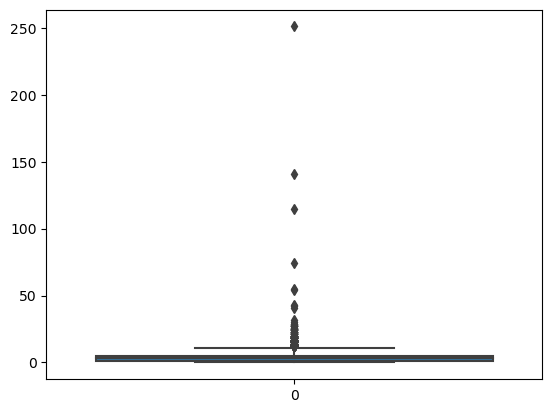

In [39]:
# Column TotalVisits
# Checking for the column outliers
cols='TotalVisits'
print(lead_score_df[cols].value_counts(dropna=False))
sns.boxplot(lead_score_df['TotalVisits'])

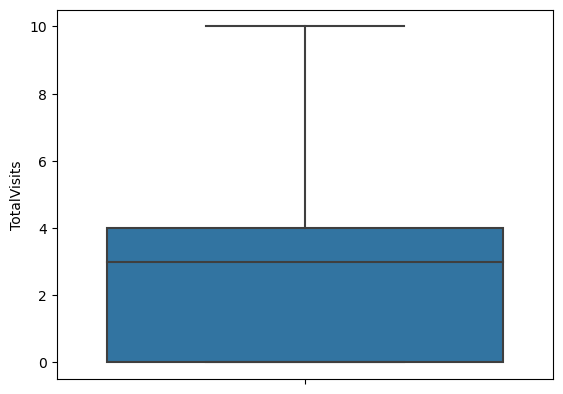

In [40]:
#Outlier Treatment
#Removing Outliers which are in extreme 5% range of the Column values

Q3 = lead_score_df[cols].quantile(0.95)
lead_score_df = lead_score_df[(lead_score_df[cols] <= Q3)]

Q1 = lead_score_df[cols].quantile(0.05)
lead_score_df = lead_score_df[(lead_score_df[cols] >= Q1)]

sns.boxplot(y=lead_score_df[cols])
plt.show()

#### Column Page Views Per Visit

Page Views Per Visit
0.00     2189
2.00     1789
3.00     1178
4.00      883
1.00      651
5.00      511
1.50      304
2.50      239
6.00      230
7.00      125
3.50       87
8.00       83
1.33       66
1.67       60
2.33       58
2.67       51
9.00       45
4.50       40
1.75       28
3.33       27
10.00      23
1.25       23
2.25       18
1.80       13
1.40       10
1.60        8
1.20        5
1.43        4
1.14        1
1.17        1
Name: count, dtype: int64


<Axes: >

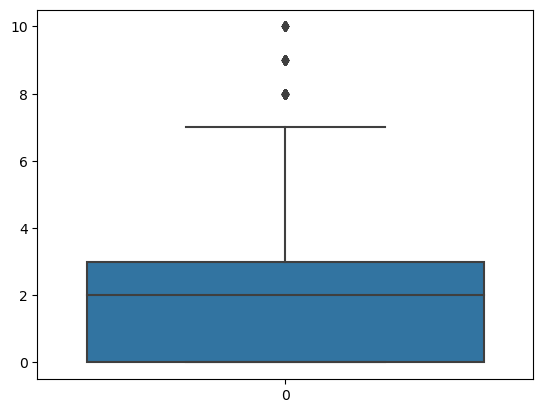

In [41]:
# Column Page Views Per Visit
# Checking for the column outliers
cols='Page Views Per Visit'
print(lead_score_df[cols].value_counts(dropna=False))
sns.boxplot(lead_score_df[cols])

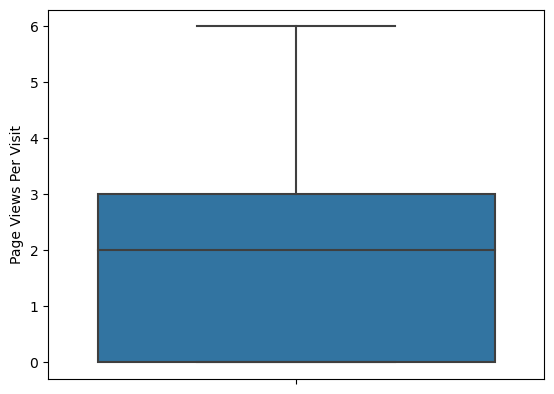

In [42]:
#Outlier Treatment
#Removing Outliers which are in extreme 5% range of the Column values

Q3 = lead_score_df[cols].quantile(0.95)
lead_score_df = lead_score_df[(lead_score_df[cols] <= Q3)]

Q1 = lead_score_df[cols].quantile(0.05)
lead_score_df = lead_score_df[(lead_score_df[cols] >= Q1)]

sns.boxplot(y=lead_score_df[cols])
plt.show()

#### Column 'Total Time Spent on Website'

Total Time Spent on Website
0       2193
127       17
234       17
87        16
62        16
        ... 
1701       1
608        1
1758       1
1229       1
1845       1
Name: count, Length: 1675, dtype: int64


<Axes: >

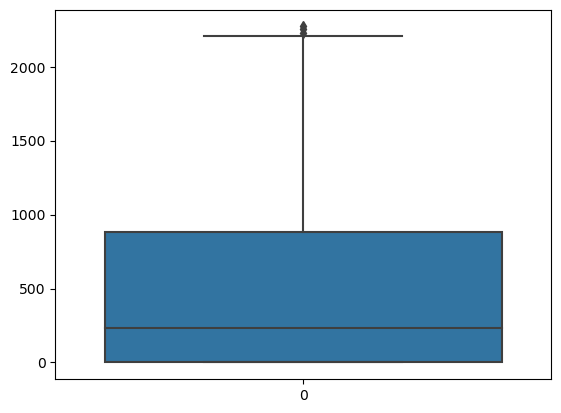

In [43]:
# Column 'Total Time Spent on Website'
# Checking for the column outliers
cols='Total Time Spent on Website'
print(lead_score_df[cols].value_counts(dropna=False))
sns.boxplot(lead_score_df[cols])

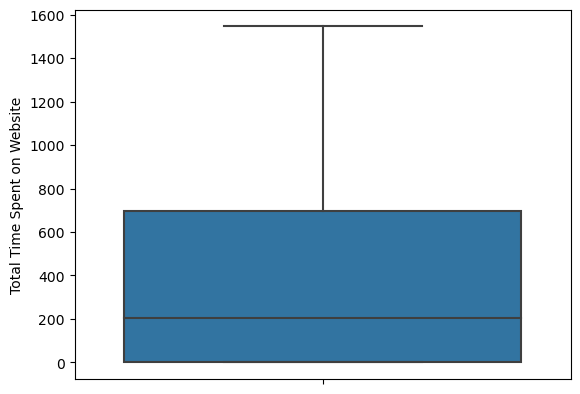

In [44]:
#Outlier Treatment
#Removing Outliers which are in extreme 5% range of the Column values

Q3 = lead_score_df[cols].quantile(0.95)
lead_score_df = lead_score_df[(lead_score_df[cols] <= Q3)]

Q1 = lead_score_df[cols].quantile(0.05)
lead_score_df = lead_score_df[(lead_score_df[cols] >= Q1)]

sns.boxplot(y=lead_score_df[cols])
plt.show()

In [45]:
#Dropping Columns that will not add any value to the model or are having multiple correlated columns
print('shape before dropping the columns', lead_score_df.shape)
lead_score_df = lead_score_df.drop(columns=['Prospect ID','Lead Number','Last Notable Activity','Tags'])
print('shape after dropping the columns', lead_score_df.shape)

shape before dropping the columns (8050, 25)
shape after dropping the columns (8050, 21)


In [46]:
#Checking the Null value percentage in colums
round(lead_score_df.isna().sum().sort_values(ascending=False)/lead_score_df.shape[0]*100,2)

Lead Origin                                      0.0
What is your current occupation                  0.0
City                                             0.0
Through Recommendations                          0.0
Digital Advertisement                            0.0
Newspaper                                        0.0
X Education Forums                               0.0
Newspaper Article                                0.0
Search                                           0.0
What matters most to you in choosing a course    0.0
Specialization                                   0.0
Lead Source                                      0.0
Country                                          0.0
Last Activity                                    0.0
Page Views Per Visit                             0.0
Total Time Spent on Website                      0.0
TotalVisits                                      0.0
Converted                                        0.0
Do Not Call                                   

### EDA

#### Univariate Analysis

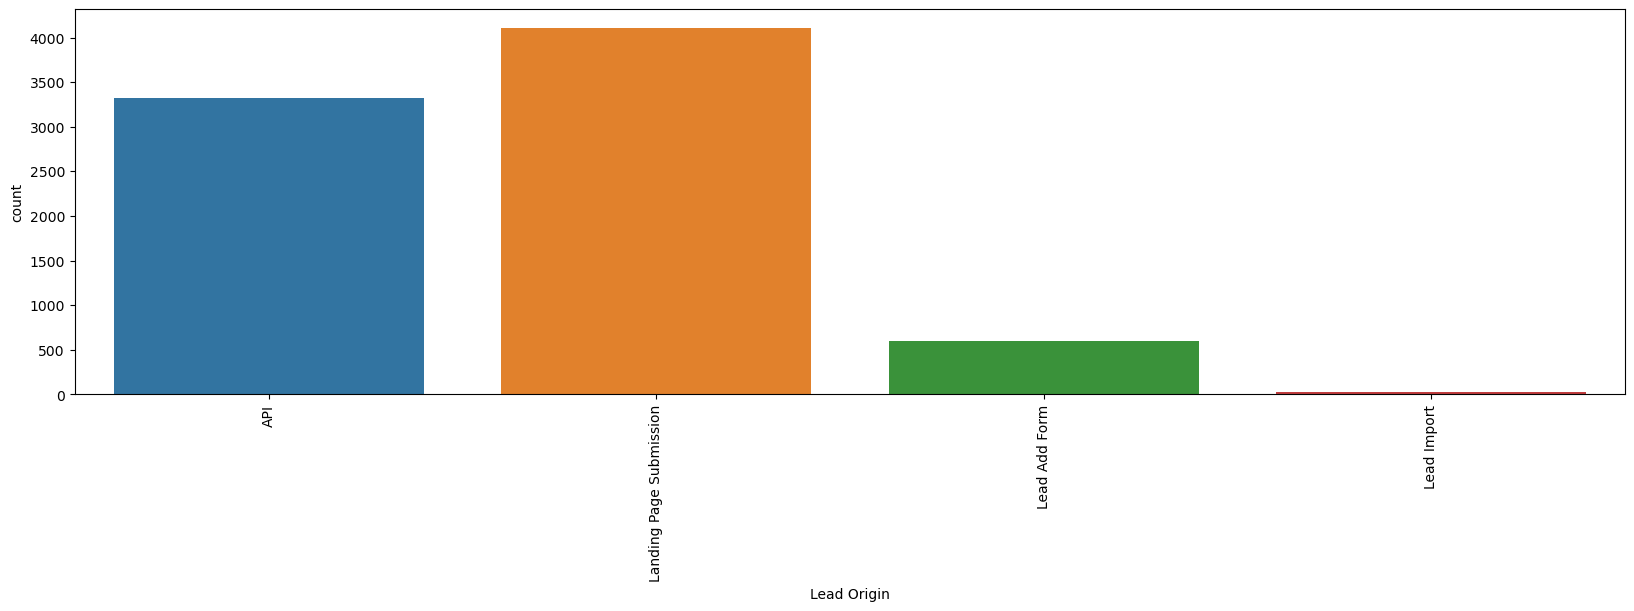

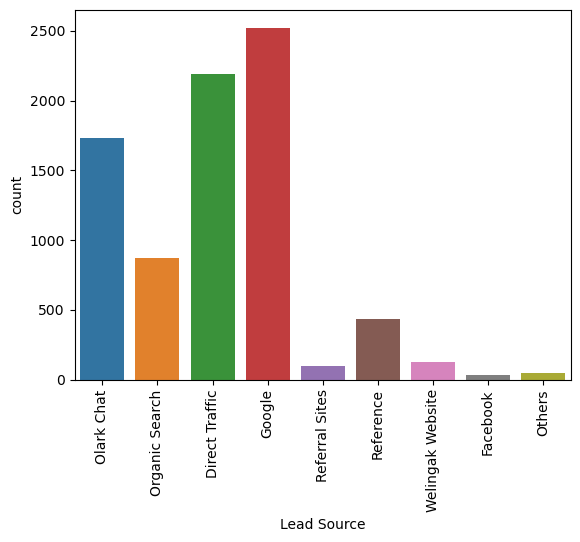

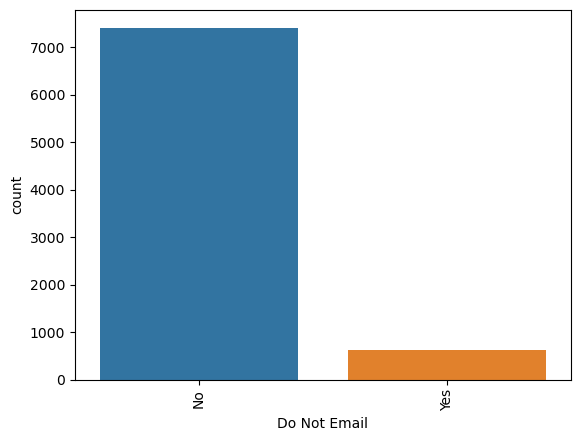

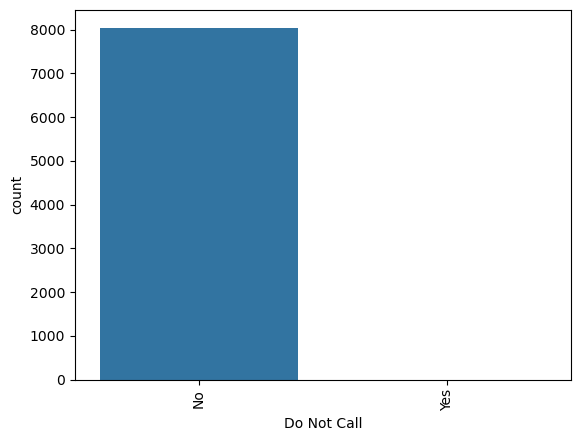

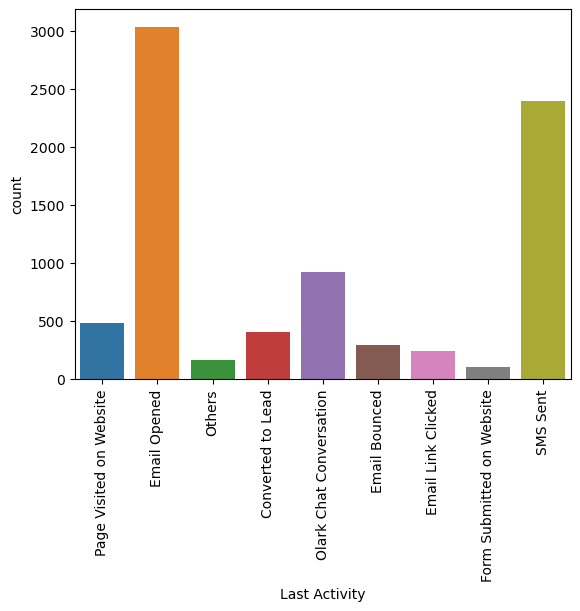

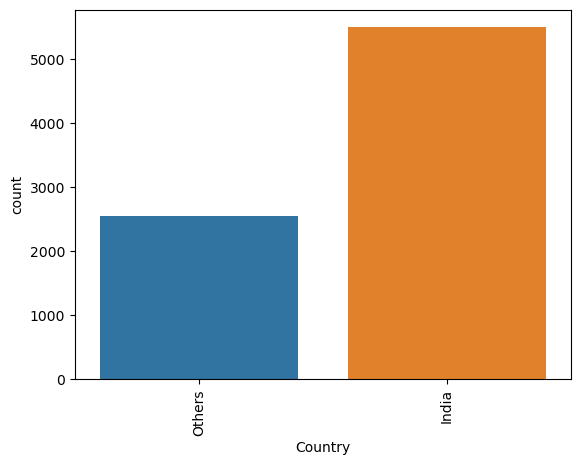

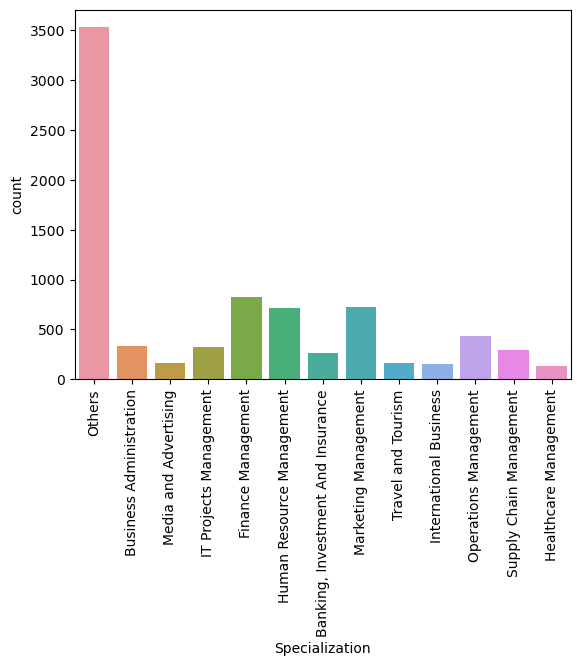

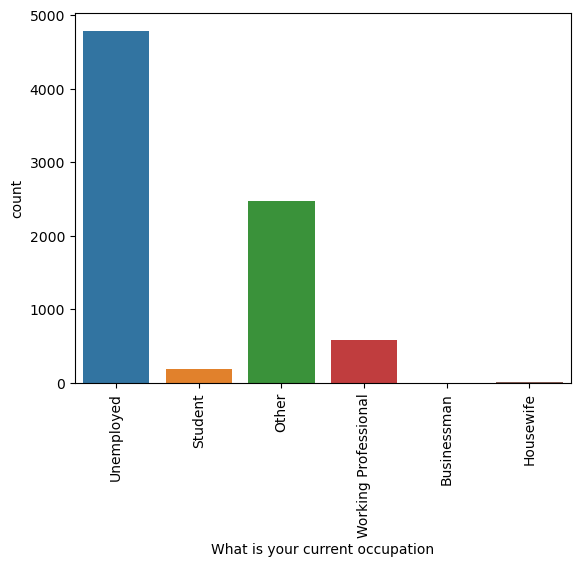

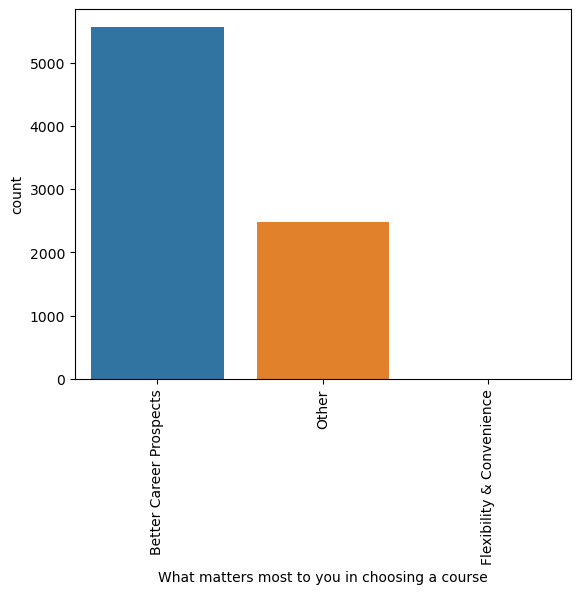

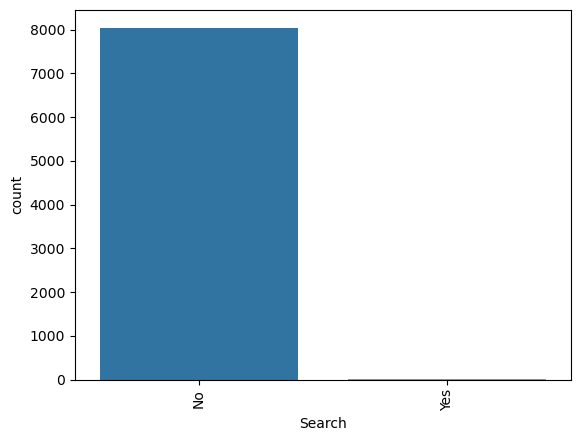

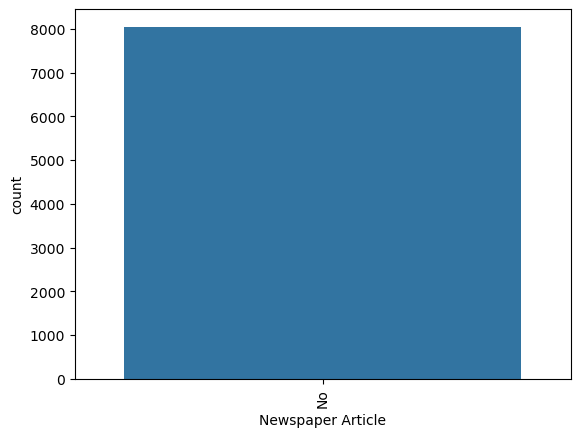

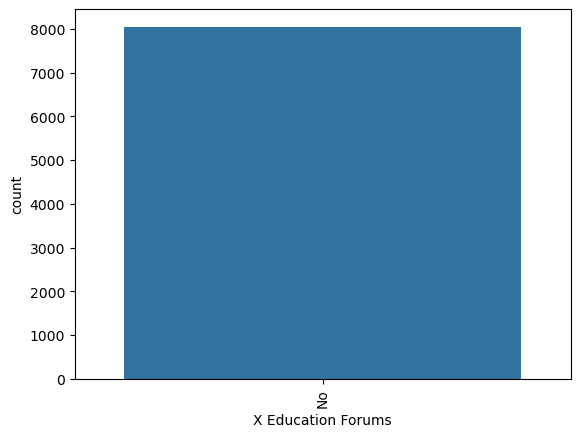

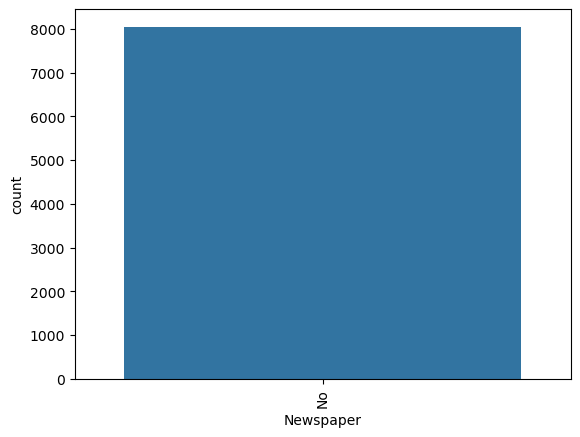

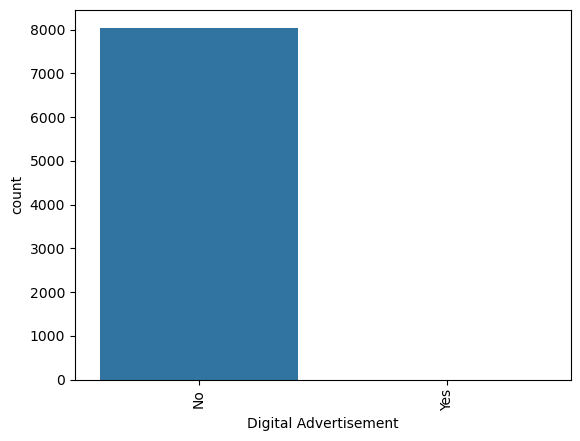

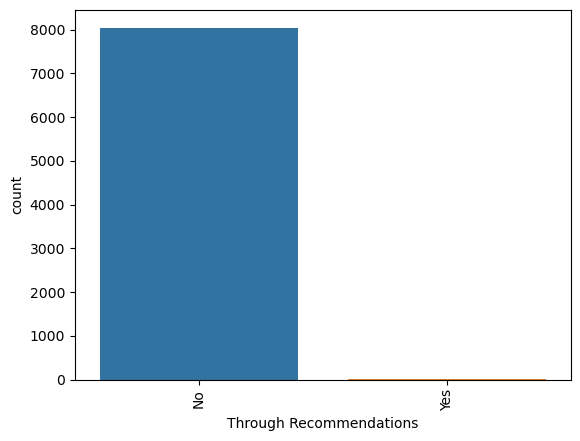

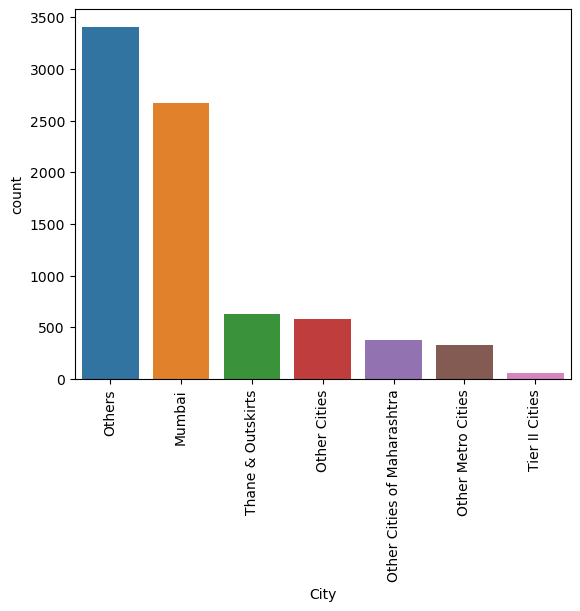

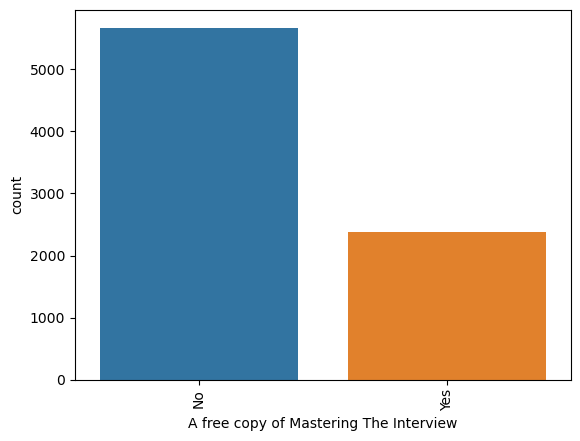

In [47]:
# plotting countplot for object dtype and histogram for number to get data distribution
cols = lead_score_df.select_dtypes(include=['object']).columns.tolist()

plt.figure(figsize=(20,5))
#plt.subplots_adjust(wspace=.2,hspace=2)
for i in cols:
    #plt.subplot(8,2, i[0])
    sns.countplot(x=i,data=lead_score_df) 
    plt.xticks(rotation=90)
    plt.show()

Key Takeaways:

- Lead Origin->'Landing Page Submission has top majority followed by 'API' while 'Lead import' has the least. 

- Lead Source-> Leading source are Google and Direct Traffic. 

- Do Not Email-> Majority of the people do not want to be emailed about the course.

- Last Activity-> Major share is with Email Opened & SMS sent.

- Country-> India is clearly the country to be targeted for the course leads.

- Specialization->Industry domain in which the customer worked before is majorly Finance, HR.

- Current_occupation-> Mostly customers are Unemployed.

### Bivariate Analysis 

#### Bivariate Analysis for Numerical Variables

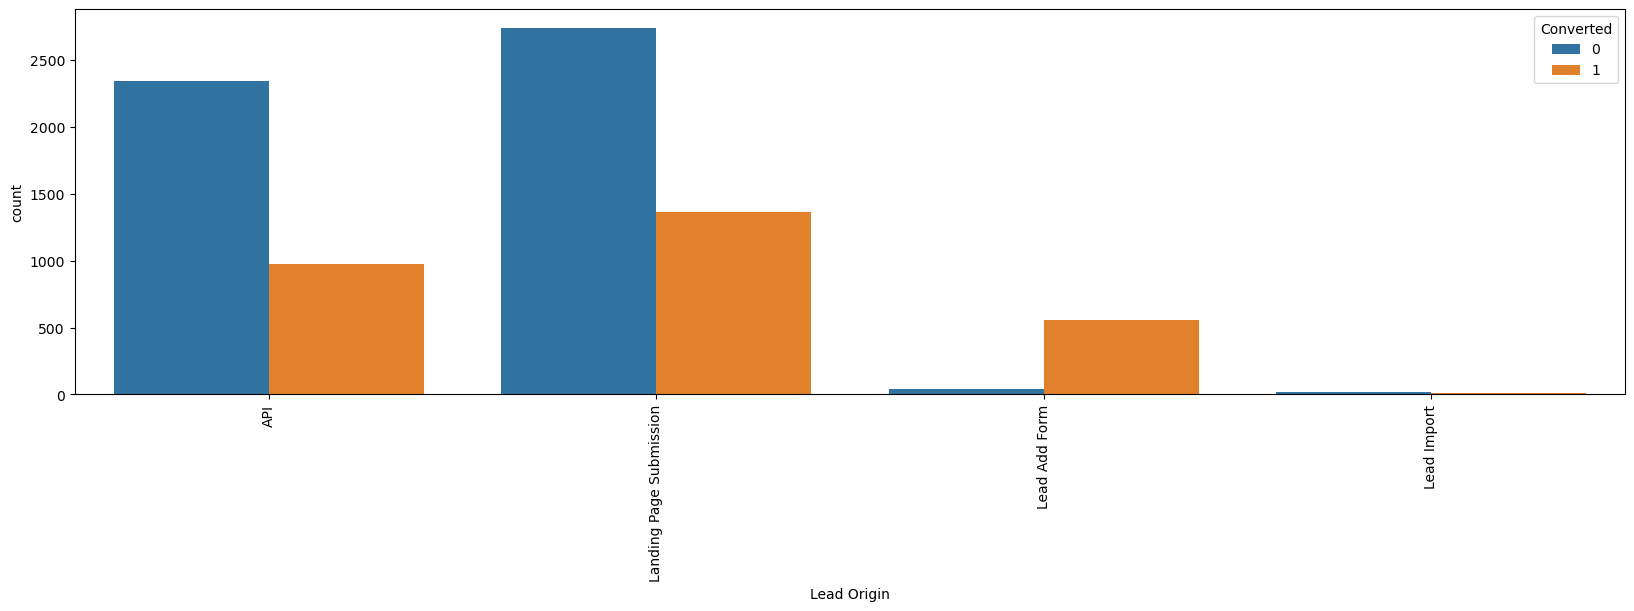

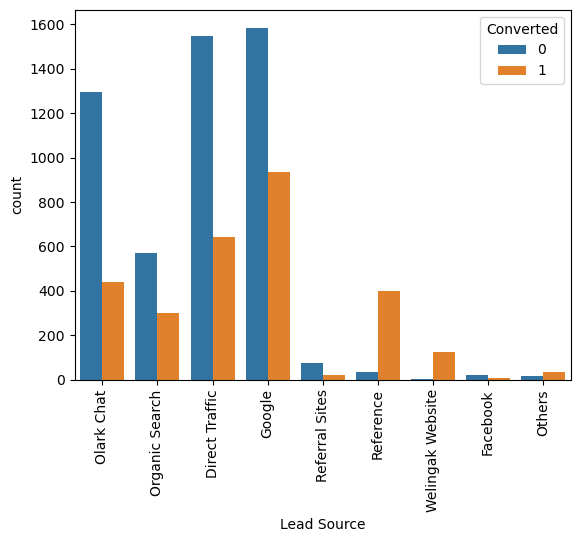

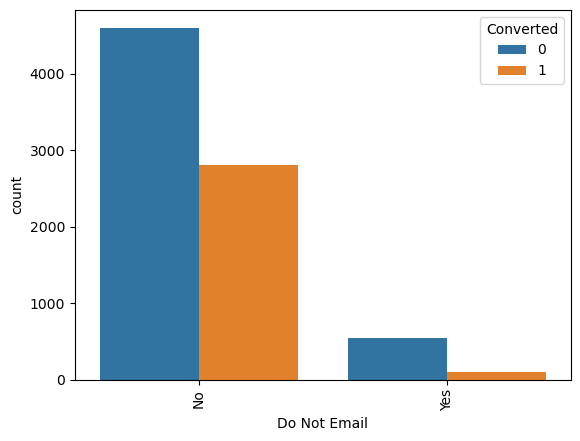

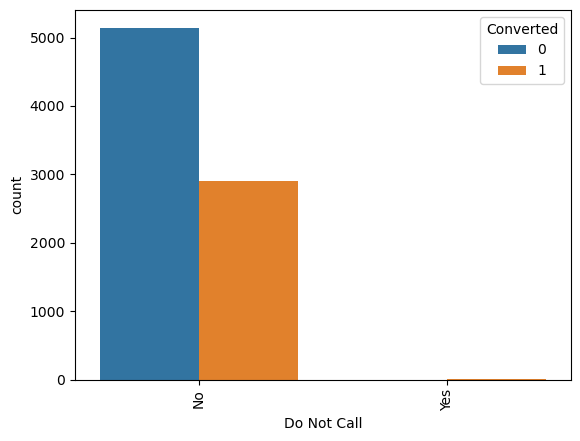

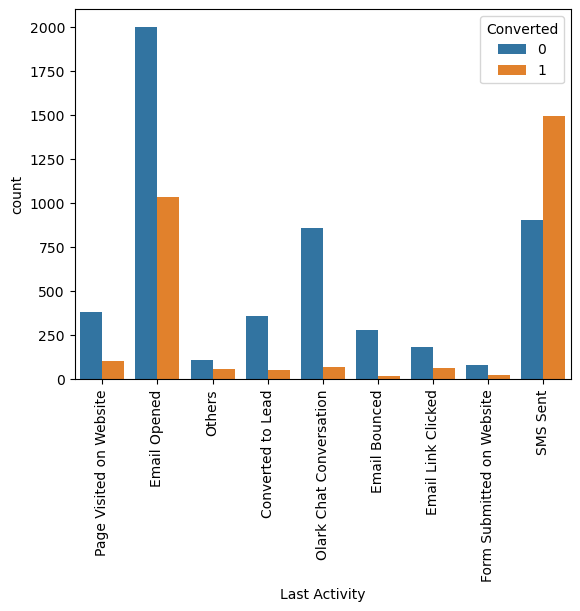

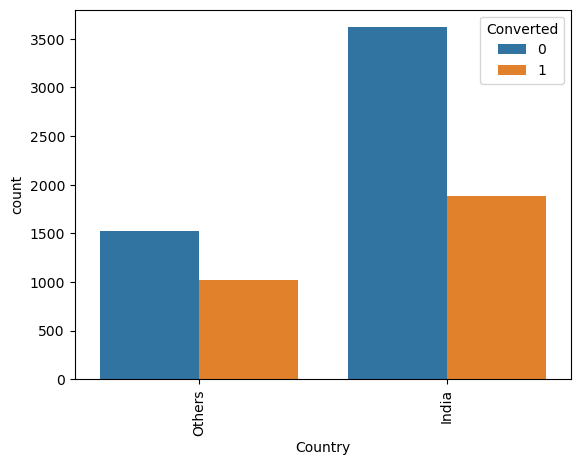

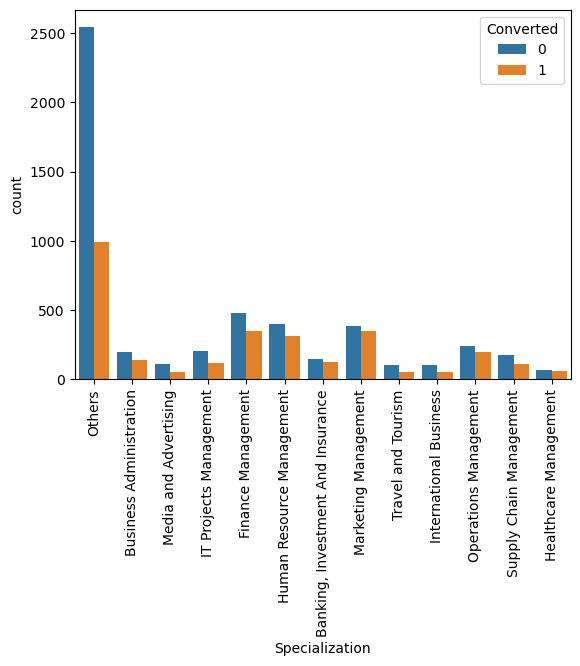

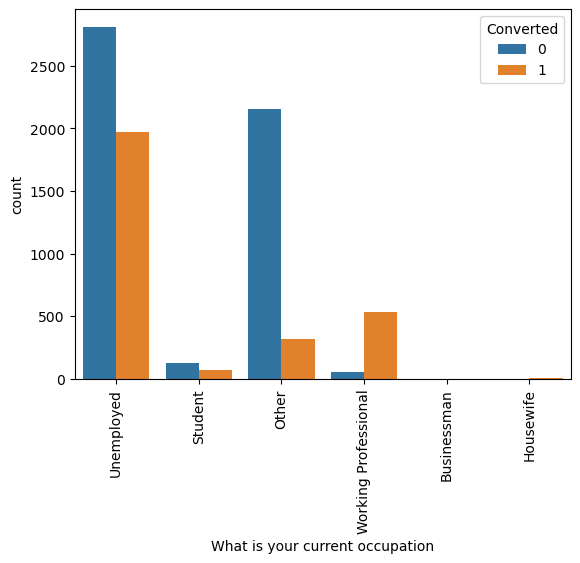

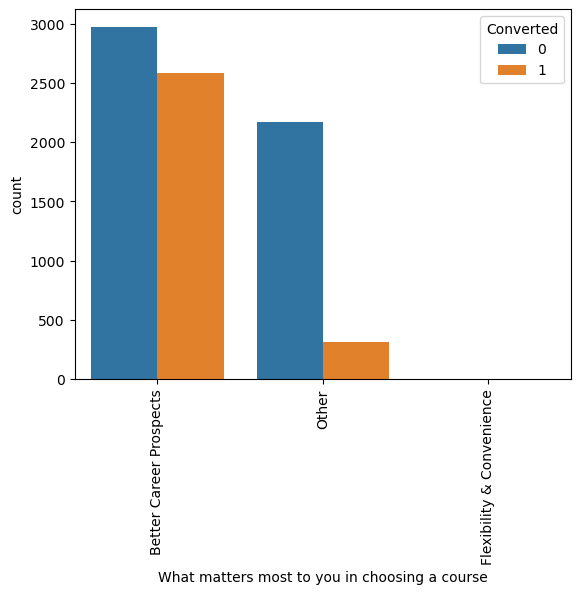

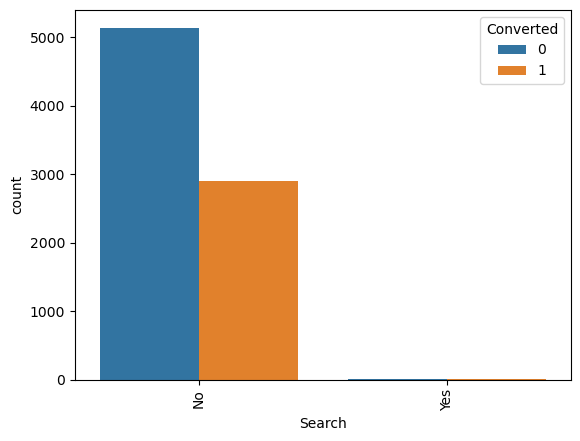

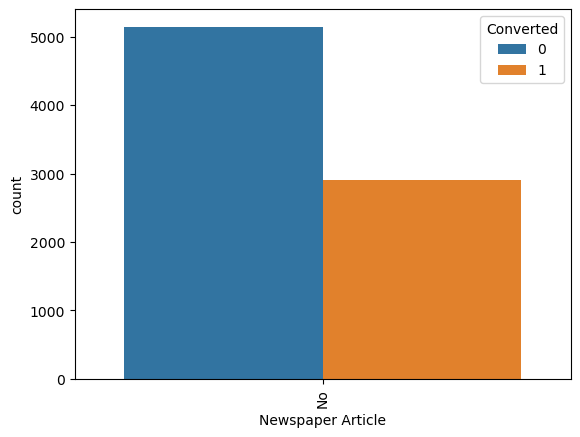

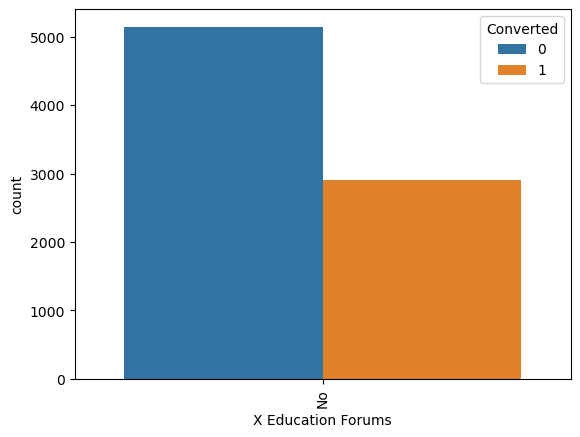

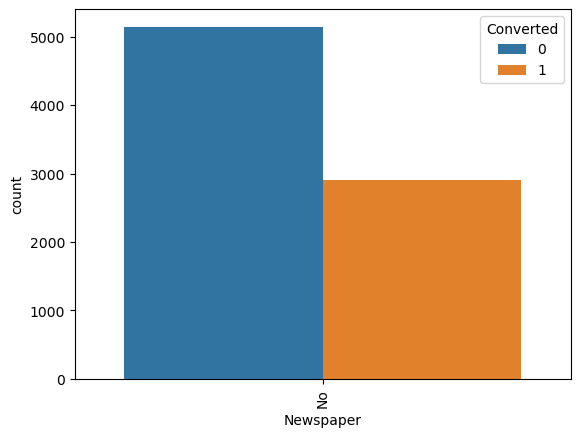

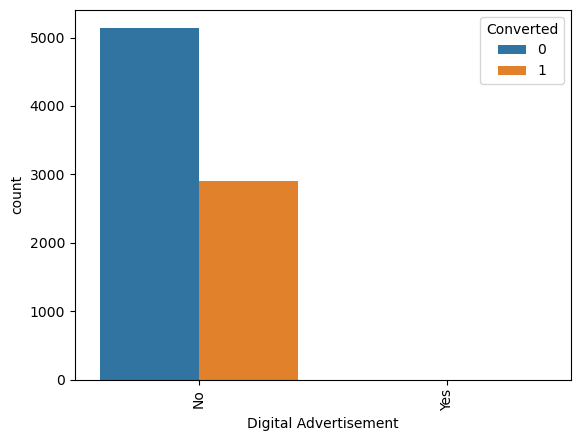

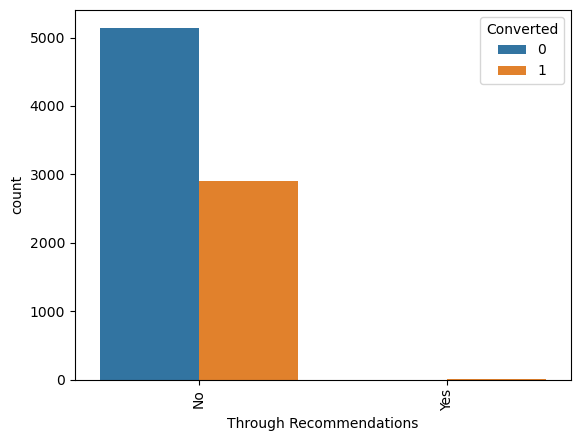

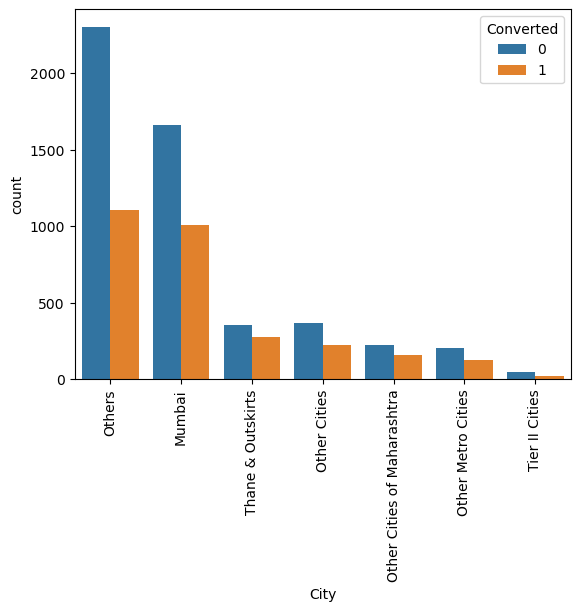

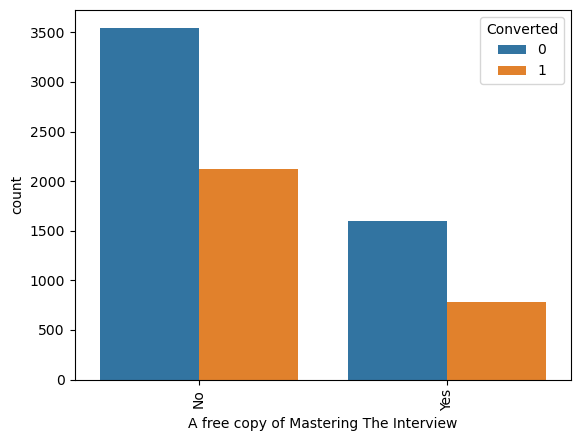

In [48]:
# plotting countplot for object dtype and histogram for number to get data distribution
cols = lead_score_df.select_dtypes(include=['object']).columns.tolist()

plt.figure(figsize=(20,5))
#plt.subplots_adjust(wspace=.2,hspace=2)
for i in cols:
    #plt.subplot(8,2, i[0])
    sns.countplot(x=i,data=lead_score_df,hue='Converted') 
    plt.xticks(rotation=90)
    plt.show()

#### Key Takeaways: 

- Leads originated from Landing page submission and Lead add Forms have most conversions.
- Google & Direct Traffic are the top most Lead Source of conversions.
- Customers whose last activity was either Email opened or SMS Sent have highest conversions
- Do Not Email column doesnot provide much information about lead conversion.
- India has the major portion of the conversions with respect to other countries.
- Finance, marketing & HR mgmt are the specialization after others to be focussed for conversions.
- Working professionals should be targeted in priority as they have the highest ratio of conversion while Houswives are the lowest.
- Better career prospects is the main reason for opting a course & clients with this reason also can be given preference.
- Tags of 'revert after reading the email' has the highest lead conversion rate amoung other tags.
- Mumbai city having highest conversion rate should be targeted first for lead conversion at priority while Tier II cities the least.
- SMS sent has the highest conversion rate followed by Email opened as their last notable activity.

Columns that have skewed data and adding not much value to model :
- 'Do Not Call',
- 'Search',
- 'Newspaper Article',
- 'X Education Forums',
- 'Newspaper',
- 'Digital Advertisement',
- 'Through Recommendations'

In [49]:
# Dropping columns with highly skewed data
cols=['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper',
      'Digital Advertisement','Through Recommendations']
print('shape before dropping the columns', lead_score_df.shape)
lead_score_df = lead_score_df.drop(columns=cols)
print('shape after dropping the columns', lead_score_df.shape)

shape before dropping the columns (8050, 21)
shape after dropping the columns (8050, 14)


In [50]:
###Data Imbalance Ratio
print('Data Imbalance Ratio : ')
(lead_score_df["Converted"].value_counts(normalize=True).loc[0])/(lead_score_df["Converted"].value_counts(normalize=True).loc[1])

Data Imbalance Ratio : 


1.772038567493113

In [51]:
100*lead_score_df["Converted"].value_counts(normalize=True)

Converted
0    63.925466
1    36.074534
Name: proportion, dtype: float64

Conversion rate = 36.07%

Non Conversion rate = 63.9%

#### Bivariate Analysis for Numerical Variables

<Figure size 1600x400 with 0 Axes>

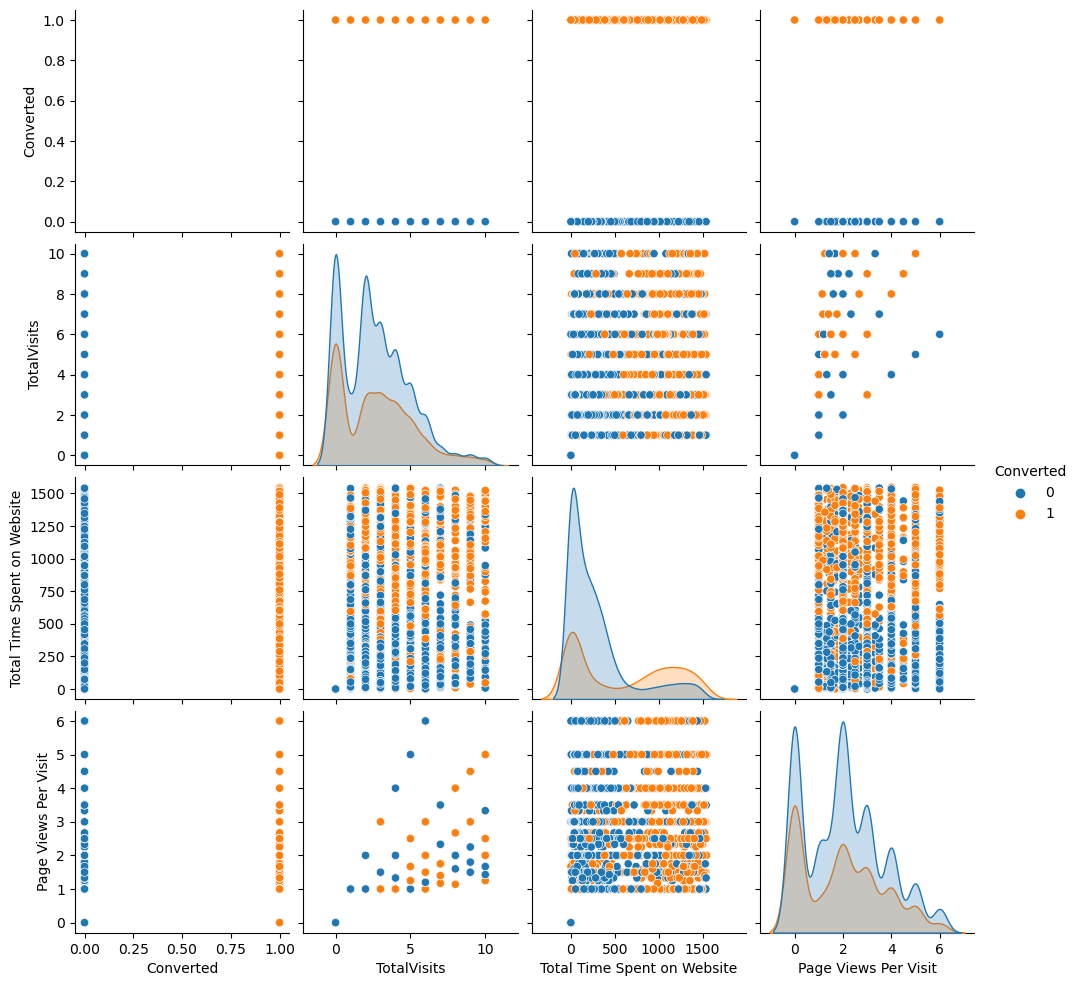

In [52]:
# plotting countplot for object dtype and histogram for number to get data distribution
cols = lead_score_df.select_dtypes(include=['int64','float64']).columns.tolist()
plt.figure(figsize=(16, 4))
sns.pairplot(data=lead_score_df,vars=cols,hue='Converted')                                  
plt.show()

#### Key Takeaways: 

Conversion Rate is more only for high values of all 3 numerical variables i.e.
- 'TotalVisits'
- 'Total Time Spent on Website'
- 'Page Views Per Visit'

Therefore, leads spending more time on site have more chance of successful convertion than those who spends less.

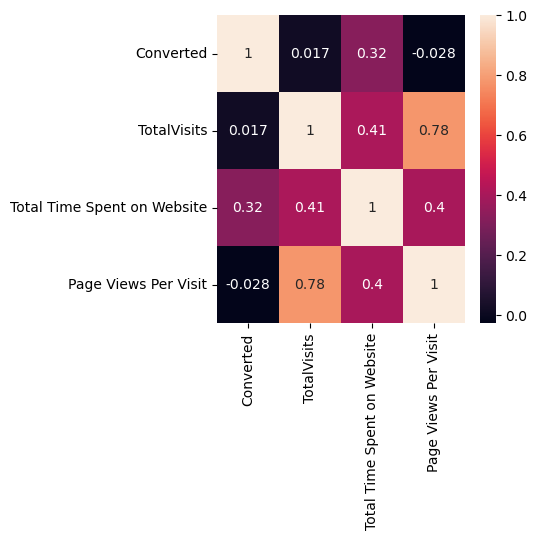

In [53]:
# Heatmap to show correlation between numerical variables
plt.figure(figsize=(4, 4))
sns.heatmap(data=lead_score_df[cols].corr(),annot=True)
plt.show()

#### Key Takeaways:

- The Total Visits of lead highly correlates with positive conversion.
- There is not much correlation between target variable and other 2 numerical variables.
- Also there is negative weak correlation between Conversion rate and 'Page Views Per Visit'

####  Data Preparation

In [54]:
# Renaming column names for readability before Dummy Creation

lead_score_df.rename(columns={'What is your current occupation': 'Current_occupation'}, inplace=True)
lead_score_df.rename(columns={'What matters most to you in choosing a course': 'Reason_Course'}, inplace=True)
lead_score_df.rename(columns={'A free copy of Mastering The Interview': 'Free_copy'}, inplace=True)

In [55]:
lead_score_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,Current_occupation,Reason_Course,City,Free_copy
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Others,Unemployed,Better Career Prospects,Others,No
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,Others,Unemployed,Better Career Prospects,Others,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,Mumbai,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,India,Media and Advertising,Unemployed,Better Career Prospects,Mumbai,No
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,India,Others,Unemployed,Better Career Prospects,Mumbai,No


In [56]:
# Mapping binary categorical variables to 1 & 0
lead_score_df['Do Not Email'] = lead_score_df['Do Not Email'].apply(lambda x: 1 if x =='Yes' else 0)
lead_score_df['Free_copy'] = lead_score_df['Free_copy'].apply(lambda x: 1 if x =='Yes' else 0)

### Dummy Variable Creation

In [57]:
lead_score_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8050 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Lead Origin                  8050 non-null   object 
 1   Lead Source                  8050 non-null   object 
 2   Do Not Email                 8050 non-null   int64  
 3   Converted                    8050 non-null   int64  
 4   TotalVisits                  8050 non-null   float64
 5   Total Time Spent on Website  8050 non-null   int64  
 6   Page Views Per Visit         8050 non-null   float64
 7   Last Activity                8050 non-null   object 
 8   Country                      8050 non-null   object 
 9   Specialization               8050 non-null   object 
 10  Current_occupation           8050 non-null   object 
 11  Reason_Course                8050 non-null   object 
 12  City                         8050 non-null   object 
 13  Free_copy              

In [58]:
lead_score_df.head(2)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,Current_occupation,Reason_Course,City,Free_copy
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Others,Unemployed,Better Career Prospects,Others,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,India,Others,Unemployed,Better Career Prospects,Others,0


In [59]:
# Creating dummy variables for categorical variables and dropping the original column.
dummy_df = pd.get_dummies(lead_score_df[['Lead Origin', 'Lead Source', 'Last Activity', 'Country',
       'Specialization', 'Current_occupation', 'Reason_Course', 'City']],drop_first=True,dtype=int)
lead_score_df_final= pd.concat([lead_score_df,dummy_df],axis=1)
lead_score_df_final.reset_index()

,index,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,Current_occupation,Reason_Course,City,Free_copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Country_Others,Specialization_Business Administration,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current_occupation_Housewife,Current_occupation_Other,Current_occupation_Student,Current_occupation_Unemployed,Current_occupation_Working Professional,Reason_Course_Flexibility & Convenience,Reason_Course_Other,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Others,City_Thane & Outskirts,City_Tier II Cities
0,0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Others,Unemployed,Better Career Prospects,Others,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,India,Others,Unemployed,Better Career Prospects,Others,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,Mumbai,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,India,Media and Advertising,Unemployed,Better Career Prospects,Mumbai,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,India,Others,Unemployed,Better Career Prospects,Mumbai,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8045,9234,Landing Page Submission,Direct Traffic,0,1,5.0,210,2.5,SMS Sent,India,Business Administration,Unemployed,Better Career Prospects,Mumbai,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
8046,9236,Landing Page Submission,Direct Traffic,0,0,2.0,238,2.0,SMS Sent,India,Media and Advertising,Unemployed,Better Career Prospects,Mumbai,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
8047,9237,Landing Page Submission,Direct Traffic,1,0,2.0,199,2.0,SMS Sent,India,Business Administration,Unemployed,Better Career Prospects,Mumbai,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
8048,9238,Landing Page Submission,Google,0,1,3.0,499,3.0,SMS Sent,India,Human Resource Management,Other,Other,Other Metro Cities,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0


In [60]:
#Dropping original column from the dataset
lead_score_df_final = lead_score_df_final.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Country',
       'Specialization', 'Current_occupation', 'Reason_Course','City'],axis=1)

In [61]:
lead_score_df_final.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Free_copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Country_Others,Specialization_Business Administration,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current_occupation_Housewife,Current_occupation_Other,Current_occupation_Student,Current_occupation_Unemployed,Current_occupation_Working Professional,Reason_Course_Flexibility & Convenience,Reason_Course_Other,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Others,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [62]:
lead_score_df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8050 entries, 0 to 9239
Data columns (total 51 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              8050 non-null   int64  
 1   Converted                                 8050 non-null   int64  
 2   TotalVisits                               8050 non-null   float64
 3   Total Time Spent on Website               8050 non-null   int64  
 4   Page Views Per Visit                      8050 non-null   float64
 5   Free_copy                                 8050 non-null   int64  
 6   Lead Origin_Landing Page Submission       8050 non-null   int32  
 7   Lead Origin_Lead Add Form                 8050 non-null   int32  
 8   Lead Origin_Lead Import                   8050 non-null   int32  
 9   Lead Source_Facebook                      8050 non-null   int32  
 10  Lead Source_Google                       

### Train test Split

In [63]:
# Putting feature variable to X
X=lead_score_df_final.drop('Converted',axis=1)
X.head(2)

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Free_copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Country_Others,Specialization_Business Administration,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current_occupation_Housewife,Current_occupation_Other,Current_occupation_Student,Current_occupation_Unemployed,Current_occupation_Working Professional,Reason_Course_Flexibility & Convenience,Reason_Course_Other,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Others,City_Thane & Outskirts,City_Tier II Cities
0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [64]:
# Putting response variable to y
y=lead_score_df_final['Converted']
y.head(2)

0    0
1    0
Name: Converted, dtype: int64

In [65]:
#splitting the dataset into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,train_size=0.7, random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(5635, 50) (2415, 50) (5635,) (2415,)


In [66]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2415 entries, 901 to 8220
Data columns (total 50 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              2415 non-null   int64  
 1   TotalVisits                               2415 non-null   float64
 2   Total Time Spent on Website               2415 non-null   int64  
 3   Page Views Per Visit                      2415 non-null   float64
 4   Free_copy                                 2415 non-null   int64  
 5   Lead Origin_Landing Page Submission       2415 non-null   int32  
 6   Lead Origin_Lead Add Form                 2415 non-null   int32  
 7   Lead Origin_Lead Import                   2415 non-null   int32  
 8   Lead Source_Facebook                      2415 non-null   int32  
 9   Lead Source_Google                        2415 non-null   int32  
 10  Lead Source_Olark Chat                 

### Feature Scaling

In [67]:
#Scaling the numerical features using Standard Scaling
Scaler=StandardScaler()
cols=X_train.select_dtypes(include=['int64','float64']).columns
X_train[cols] = Scaler.fit_transform(X_train[cols])

In [68]:
X_train.head(2)

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Free_copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Country_Others,Specialization_Business Administration,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current_occupation_Housewife,Current_occupation_Other,Current_occupation_Student,Current_occupation_Unemployed,Current_occupation_Working Professional,Reason_Course_Flexibility & Convenience,Reason_Course_Other,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Others,City_Thane & Outskirts,City_Tier II Cities
3884,-0.298848,-1.156434,-0.845381,-1.215394,-0.650093,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
5176,-0.298848,0.139094,-0.696305,-0.312575,-0.650093,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0


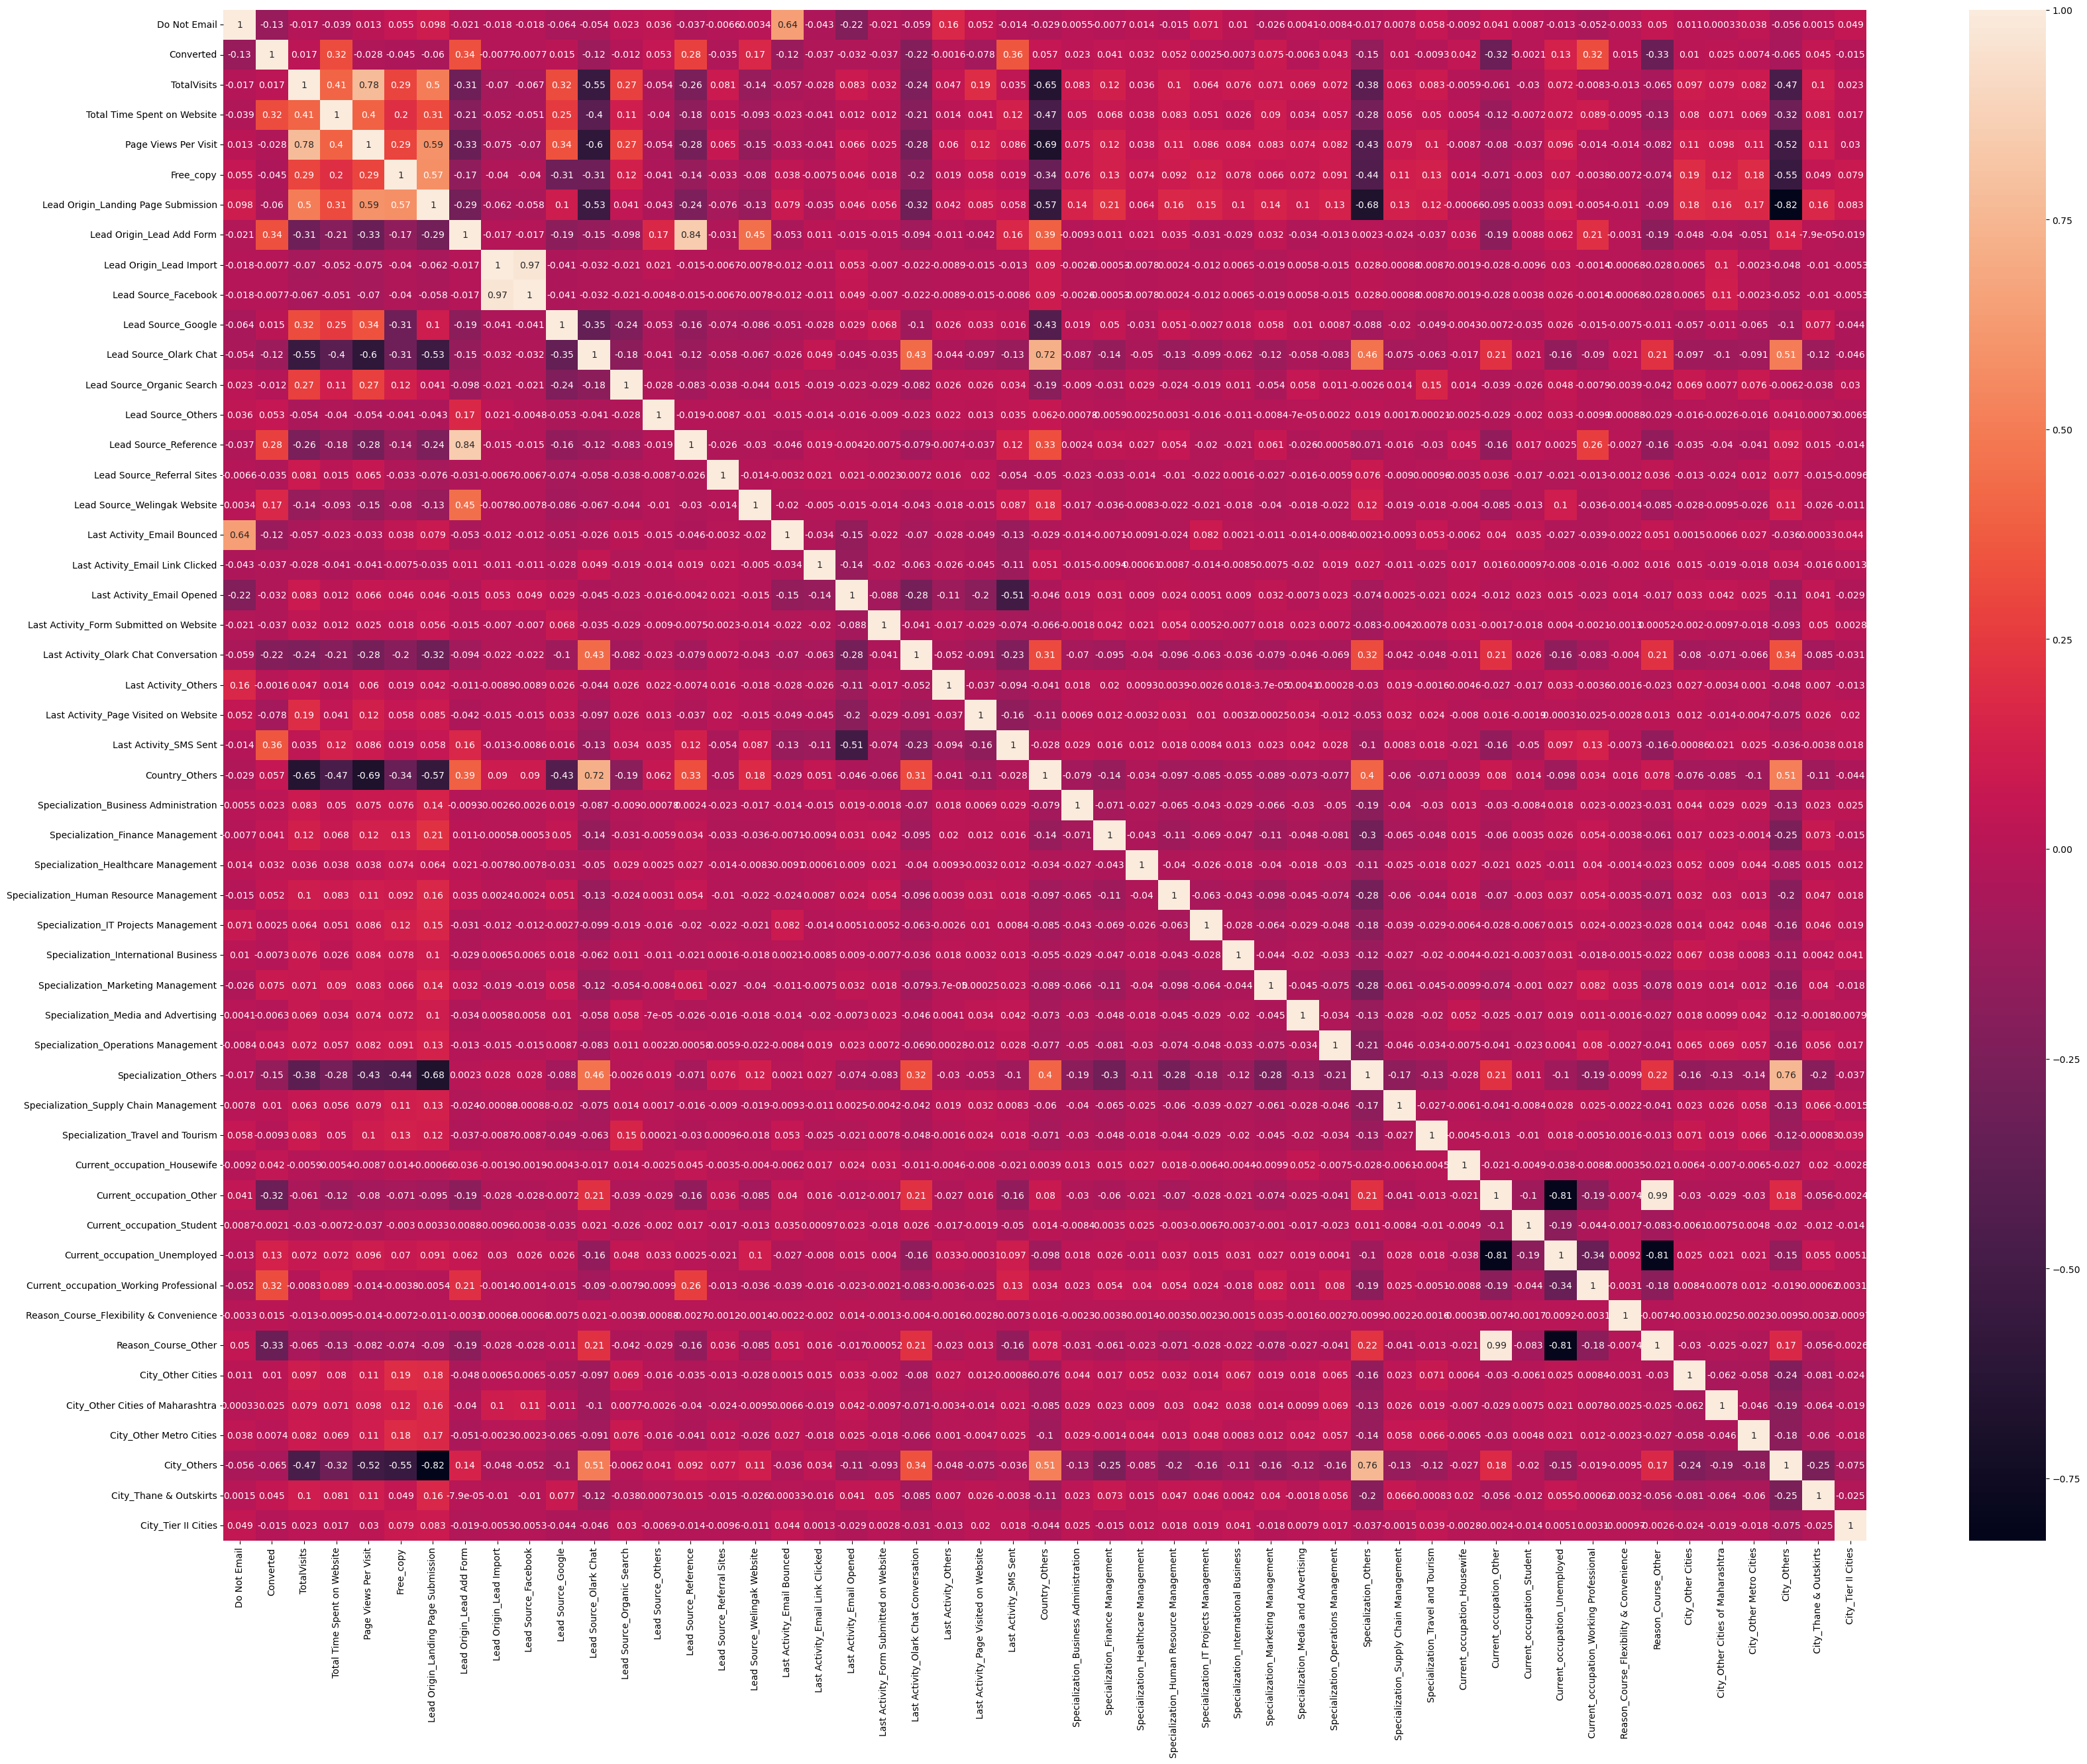

In [69]:
# Let's see the correlation matrix 
plt.figure(figsize = (40,30))        # Size of the figure
sns.heatmap(lead_score_df_final.corr(),annot = True)
plt.show()

### Dropping highly correlated dummy variables

In [70]:
X_test = X_test.drop(['City_Others','Reason_Course_Other'], axis=1)
X_train = X_train.drop(['City_Others','Reason_Course_Other'],axis= 1)

### Model Building

In [71]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

### Feature Selection Using RFE (Recursive Feature Elimination)

In [72]:
#Feature Selection Using RFE
from sklearn.feature_selection import RFE
rfe=RFE(logreg, n_features_to_select=15)
rfe=rfe.fit(X_train,y_train)

In [73]:
#Combining feature & their respective ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', False, 5),
 ('TotalVisits', False, 7),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 8),
 ('Free_copy', False, 18),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 19),
 ('Lead Source_Facebook', False, 20),
 ('Lead Source_Google', False, 30),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 29),
 ('Lead Source_Others', False, 2),
 ('Lead Source_Reference', False, 16),
 ('Lead Source_Referral Sites', False, 6),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 13),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 17),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 14),
 ('Last Activity_SMS Sent', True, 1),
 ('Country_O

In [74]:
#Columns to be considered in model building
cols=X_train.columns[rfe.support_]
cols

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_Media and Advertising', 'Specialization_Others',
       'Current_occupation_Other', 'Current_occupation_Working Professional',
       'City_Tier II Cities'],
      dtype='object')

In [75]:
#Columns not to be considered in model building
X_train.columns[~rfe.support_].to_list()

['Do Not Email',
 'TotalVisits',
 'Page Views Per Visit',
 'Free_copy',
 'Lead Origin_Lead Import',
 'Lead Source_Facebook',
 'Lead Source_Google',
 'Lead Source_Organic Search',
 'Lead Source_Others',
 'Lead Source_Reference',
 'Lead Source_Referral Sites',
 'Last Activity_Email Link Clicked',
 'Last Activity_Form Submitted on Website',
 'Last Activity_Page Visited on Website',
 'Country_Others',
 'Specialization_Business Administration',
 'Specialization_Finance Management',
 'Specialization_Healthcare Management',
 'Specialization_Human Resource Management',
 'Specialization_IT Projects Management',
 'Specialization_International Business',
 'Specialization_Marketing Management',
 'Specialization_Operations Management',
 'Specialization_Supply Chain Management',
 'Specialization_Travel and Tourism',
 'Current_occupation_Housewife',
 'Current_occupation_Student',
 'Current_occupation_Unemployed',
 'Reason_Course_Flexibility & Convenience',
 'City_Other Cities',
 'City_Other Cities of

### Assessing the model with StatsModels

In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#### UDF for VIF Calculation

In [77]:
#User Defined function for VIF calculation
def vif_calc(df):
    vif=pd.DataFrame()
    vif['Features'] = df[cols].columns
    vif['VIF'] = [variance_inflation_factor(X_train[cols].values , i) for i in range(X_train[cols].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = 'VIF' , ascending= False)
    vif = vif.reset_index(drop=True)
    return vif

### Model 1

In [78]:
import statsmodels.api as sm
# Adding a constant variable from X_train dataframe with variables selected by RFE
X_train_sm=sm.add_constant(X_train[cols])
# Create a fitted model
logreg_model1 = sm.GLM(y_train, X_train_sm,family=sm.families.Binomial())
res = logreg_model1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5635
Model:                            GLM   Df Residuals:                     5619
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2149.4
Date:                Fri, 12 Jan 2024   Deviance:                       4298.9
Time:                        20:19:08   Pearson chi2:                 5.60e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.4156
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.1549      0.160     -7.198      0.000      -1.469      -0.840
Total Time Spent on Website                 1.0733      0.044     24.622      0.000       0.988       1.159
Lead Origin_Landing Page Submission        -0.9246      0.127     -7.273      0.000      -1.174      -0.675
Lead Origin_Lead Add Form                   3.1322      0.233     13.418      0.000       2.675       3.590
Lead Source_Olark Chat                      1.2718      0.132      9.663      0.000       1.014       1.530
Lead Source_Welingak Website               22.8216   1.32e+04      0.002      0.999   -2.58e+04    2.58e+04
Last Activity_Email Bounced                -1.6820      0.450     -3.735      0.000      -2.565      -0.799
Last Activity_Email Opened                  0.7368      0.125      5.872      0.000       0.491       0.983
Last Activity_Olark Chat Conversation      -0.8165      0.212     -3.849      0.000      -1.232      -0.401
Last Activity_Others                        1.0338      0.262      3.943      0.000       0.520       1.548
Last Activity_SMS Sent                      1.9870      0.128     15.505      0.000       1.736       2.238
Specialization_Media and Advertising       -0.6546      0.260     -2.518      0.012      -1.164      -0.145
Specialization_Others                      -0.7272      0.114     -6.384      0.000      -0.950      -0.504
Current_occupation_Other                   -1.2655      0.098    -12.920      0.000      -1.457      -1.074
Current_occupation_Working Professional     2.6987      0.211     12.813      0.000       2.286       3.111
City_Tier II Cities                        -0.6181      0.456     -1.354      0.176      -1.513       0.276
===========================================================================================================
"""

In [79]:
#VIF Checking
vif_calc(X_train[cols])

,Features,VIF
0,Lead Origin_Landing Page Submission,2.65
1,Specialization_Others,2.56
2,Last Activity_Email Opened,2.45
3,Last Activity_SMS Sent,2.32
4,Lead Source_Olark Chat,2.31
5,Last Activity_Olark Chat Conversation,1.84
6,Lead Origin_Lead Add Form,1.78
7,Current_occupation_Other,1.61
8,Total Time Spent on Website,1.34
9,Lead Source_Welingak Website,1.31


#### Key Take away:

'Lead Source_Welingak Website' has high p-value of 0.999.Therefore this column will be removed from the model.

In [80]:
# Dropping column with high p-value
cols=cols.drop("Lead Source_Welingak Website")

### Model 2

In [81]:
import statsmodels.api as sm
# Adding a constant variable from X_train dataframe with variables selected by RFE
X_train_sm=sm.add_constant(X_train[cols])
# Create a fitted model
logreg_model1 = sm.GLM(y_train, X_train_sm,family=sm.families.Binomial())
res = logreg_model1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5635
Model:                            GLM   Df Residuals:                     5620
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2161.4
Date:                Fri, 12 Jan 2024   Deviance:                       4322.7
Time:                        20:19:23   Pearson chi2:                 5.93e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4131
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.1862      0.160     -7.396      0.000      -1.501      -0.872
Total Time Spent on Website                 1.0730      0.044     24.631      0.000       0.988       1.158
Lead Origin_Landing Page Submission        -0.8933      0.127     -7.041      0.000      -1.142      -0.645
Lead Origin_Lead Add Form                   3.5913      0.228     15.754      0.000       3.145       4.038
Lead Source_Olark Chat                      1.2686      0.131      9.654      0.000       1.011       1.526
Last Activity_Email Bounced                -1.6845      0.449     -3.748      0.000      -2.565      -0.804
Last Activity_Email Opened                  0.7349      0.125      5.871      0.000       0.490       0.980
Last Activity_Olark Chat Conversation      -0.8063      0.211     -3.826      0.000      -1.219      -0.393
Last Activity_Others                        1.0176      0.263      3.865      0.000       0.502       1.534
Last Activity_SMS Sent                      1.9835      0.128     15.517      0.000       1.733       2.234
Specialization_Media and Advertising       -0.6496      0.260     -2.496      0.013      -1.160      -0.140
Specialization_Others                      -0.6839      0.114     -6.011      0.000      -0.907      -0.461
Current_occupation_Other                   -1.2695      0.098    -12.966      0.000      -1.461      -1.078
Current_occupation_Working Professional     2.6867      0.211     12.738      0.000       2.273       3.100
City_Tier II Cities                        -0.6206      0.456     -1.361      0.174      -1.514       0.273
===========================================================================================================
"""

#### Key Take away:

'City_Tier II Cities' has high p-value of 0.174.Therefore this column will be removed from the model.

In [82]:
# Dropping column with high p-value
cols=cols.drop("City_Tier II Cities")

### Model 3

In [83]:
import statsmodels.api as sm
# Adding a constant variable from X_train dataframe with variables selected by RFE
X_train_sm=sm.add_constant(X_train[cols])
# Create a fitted model
logreg_model1 = sm.GLM(y_train, X_train_sm,family=sm.families.Binomial())
res = logreg_model1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5635
Model:                            GLM   Df Residuals:                     5621
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2162.3
Date:                Fri, 12 Jan 2024   Deviance:                       4324.6
Time:                        20:19:41   Pearson chi2:                 5.90e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4129
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.1868      0.160     -7.401      0.000      -1.501      -0.872
Total Time Spent on Website                 1.0721      0.044     24.625      0.000       0.987       1.157
Lead Origin_Landing Page Submission        -0.9025      0.127     -7.127      0.000      -1.151      -0.654
Lead Origin_Lead Add Form                   3.5897      0.228     15.749      0.000       3.143       4.036
Lead Source_Olark Chat                      1.2672      0.131      9.646      0.000       1.010       1.525
Last Activity_Email Bounced                -1.6860      0.449     -3.754      0.000      -2.566      -0.806
Last Activity_Email Opened                  0.7381      0.125      5.896      0.000       0.493       0.983
Last Activity_Olark Chat Conversation      -0.8044      0.211     -3.817      0.000      -1.217      -0.391
Last Activity_Others                        1.0243      0.263      3.892      0.000       0.508       1.540
Last Activity_SMS Sent                      1.9824      0.128     15.508      0.000       1.732       2.233
Specialization_Media and Advertising       -0.6419      0.260     -2.467      0.014      -1.152      -0.132
Specialization_Others                      -0.6848      0.114     -6.026      0.000      -0.908      -0.462
Current_occupation_Other                   -1.2679      0.098    -12.949      0.000      -1.460      -1.076
Current_occupation_Working Professional     2.6893      0.211     12.745      0.000       2.276       3.103
===========================================================================================================
"""

#### Key Take away:

'Specialization_Media and Advertising' has p-value of 0.014.Therefore this column will be removed from the model.

In [83]:
# Dropping column with high p-value
cols=cols.drop("Specialization_Media and Advertising")

### Model 4

In [84]:
import statsmodels.api as sm
# Adding a constant variable from X_train dataframe with variables selected by RFE
X_train_sm=sm.add_constant(X_train[cols])
# Create a fitted model
logreg_model1 = sm.GLM(y_train, X_train_sm,family=sm.families.Binomial())
res = logreg_model1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5635
Model:                            GLM   Df Residuals:                     5622
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2165.5
Date:                Fri, 12 Jan 2024   Deviance:                       4331.0
Time:                        15:27:47   Pearson chi2:                 5.88e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4122
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.2106      0.160     -7.569      0.000      -1.524      -0.897
Total Time Spent on Website                 1.0722      0.043     24.658      0.000       0.987       1.157
Lead Origin_Landing Page Submission        -0.9018      0.126     -7.130      0.000      -1.150      -0.654
Lead Origin_Lead Add Form                   3.5950      0.228     15.782      0.000       3.149       4.041
Lead Source_Olark Chat                      1.2638      0.131      9.634      0.000       1.007       1.521
Last Activity_Email Bounced                -1.6768      0.448     -3.743      0.000      -2.555      -0.799
Last Activity_Email Opened                  0.7395      0.125      5.908      0.000       0.494       0.985
Last Activity_Olark Chat Conversation      -0.8058      0.211     -3.823      0.000      -1.219      -0.393
Last Activity_Others                        1.0154      0.262      3.871      0.000       0.501       1.530
Last Activity_SMS Sent                      1.9740      0.128     15.453      0.000       1.724       2.224
Specialization_Others                      -0.6578      0.113     -5.821      0.000      -0.879      -0.436
Current_occupation_Other                   -1.2652      0.098    -12.938      0.000      -1.457      -1.074
Current_occupation_Working Professional     2.6754      0.210     12.712      0.000       2.263       3.088
===========================================================================================================
"""

Model 4 seems stable and has acceptable p-values within the threshold which can be used for further analysis.

In [85]:
#Checking VIFs for any multicollinearity among the independent variables
vif_calc(X_train[cols])

,Features,VIF
0,Lead Origin_Landing Page Submission,2.60
1,Specialization_Others,2.51
2,Last Activity_Email Opened,2.44
3,Last Activity_SMS Sent,2.31
4,Lead Source_Olark Chat,2.30
5,Last Activity_Olark Chat Conversation,1.84
6,Current_occupation_Other,1.61
7,Lead Origin_Lead Add Form,1.46
8,Total Time Spent on Website,1.34
9,Current_occupation_Working Professional,1.20


- All features have VIF values less than 5.
- p-values for all variables <= 0.05

So, Model 4 will be final model for evaluation.

### Model Evaluation

#### Creating a dataframe with the actual lead score flag and the predicted probabilities

In [86]:
y_train_pred=res.predict(X_train_sm)
y_train_pred=y_train_pred.values.reshape(-1)
y_train_pred[:3]

array([0.02706727, 0.1294192 , 0.9881748 ])

In [87]:
# Creating a dataframe with the actual Converted flag and the predicted values by model
# new column 'Converted_Prob' with y_train_pred values by model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.027067,3884
1,0,0.129419,5176
2,1,0.988175,7327
3,0,0.041555,3331
4,0,0.613735,1216


In [88]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final["Converted_Prob"].map(lambda x: 1 if x > 0.5 else 0)

# checking head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted
0,0,0.027067,3884,0
1,0,0.129419,5176,0
2,1,0.988175,7327,1
3,0,0.041555,3331,0
4,0,0.613735,1216,1


### Checking Accuracy

Accuracy is used to measure the performance of the model. 
It is the ratio of Total correct instances to the total instances.

In [89]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [90]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final['Converted'],y_train_pred_final['Predicted']))

0.8273291925465839


### Confusion Matrix

In [91]:
from sklearn.metrics import confusion_matrix

In [92]:
#Creating Confusion Matrix
Confusion=confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final['Predicted'])
print(Confusion)

[[3287  352]
 [ 621 1375]]


### Sensitivity and Specificity

In [93]:
TP=Confusion[1,1]
TN=Confusion[0,0]
FP=Confusion[0,1]
FN=Confusion[1,0]

In [94]:
print("Sensitivity :",TP / float(TP+FN))
print("Specificity :",TN / float(TN+FP))

Sensitivity : 0.688877755511022
Specificity : 0.9032701291563616


In [95]:
# False postive rate - predicting converted when customer does not have converted
print(FP/ float(TN+FP))

0.09672987084363836


In [96]:
# Precision/positive predictive value 
print (TP / float(TP+FP))

0.7961783439490446


In [97]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8410951893551689


### Plotting the ROC Curve
It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).

In [98]:
#User defined function for drawing ROC
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [99]:
fpr,tpr,thresholds = metrics.roc_curve(y_train_pred_final.Converted,y_train_pred_final.Converted_Prob,drop_intermediate=False)

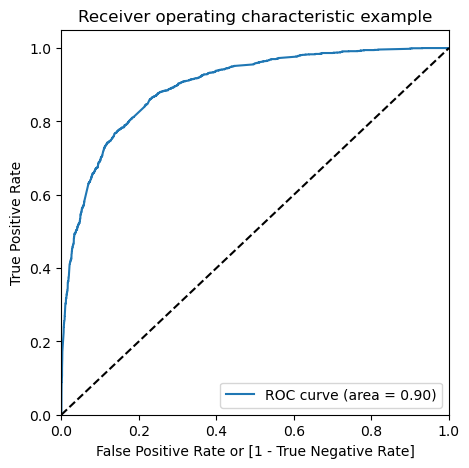

In [100]:
#Drawing ROC curve
draw_roc(y_train_pred_final.Converted,y_train_pred_final.Converted_Prob)

### Finding Optimal Cutoff Point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [101]:
#columns with different probability cutoffs 
num = [float(x)/10 for x in range(10)]
for i in num:
    y_train_pred_final[i]=y_train_pred_final.Converted_Prob.map(lambda x:1 if x>i else 0)
    
y_train_pred_final.head(3)

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.027067,3884,0,1,0,0,0,0,0,0,0,0,0
1,0,0.129419,5176,0,1,1,0,0,0,0,0,0,0,0
2,1,0.988175,7327,1,1,1,1,1,1,1,1,1,1,1


In [102]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [float(x)/10 for x in range(10)]
for i in num:
    cm = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total=sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    
    spec = cm[0,0]/(cm[0,0]+cm[0,1])
    sens = cm[1,1]/(cm[1,0]+cm[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sens,spec]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.354215  1.000000  0.000000
0.1   0.1  0.643833  0.965932  0.467161
0.2   0.2  0.770541  0.902305  0.698269
0.3   0.3  0.801242  0.862224  0.767793
0.4   0.4  0.827862  0.761022  0.864523
0.5   0.5  0.827329  0.688878  0.903270
0.6   0.6  0.823602  0.632265  0.928552
0.7   0.7  0.801242  0.520541  0.955207
0.8   0.8  0.782076  0.432365  0.973894
0.9   0.9  0.746229  0.303106  0.989283


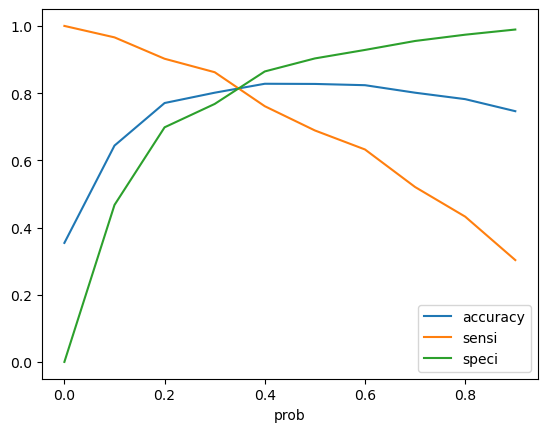

In [103]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob',y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.34 is the optimum point to take it as a cutoff probability.

In [104]:
y_train_pred_final['Final_Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x :1 if x > 0.34 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,0,0.027067,3884,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.129419,5176,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.988175,7327,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.041555,3331,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.613735,1216,1,1,1,1,1,1,1,1,0,0,0,1


In [105]:
# Overall Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)

0.8172138420585625

In [106]:
#Confusion Matrix
Confusion2=confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Final_Predicted)
print(Confusion2)

[[3010  629]
 [ 401 1595]]


In [107]:
TP=Confusion2[1,1]
TN=Confusion2[0,0]
FP=Confusion2[0,1]
FN=Confusion2[1,0]

In [108]:
#Sensitivity
TP/float(TP+FN)

0.7990981963927856

In [109]:
#Specificity
TN/float(TN+FP)

0.8271503160208848

In [110]:
# Calculate false postive rate - predicting Converted when customer does not have churned
print(FP/ float(TN+FP))

0.17284968397911515


In [111]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7171762589928058


In [112]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8824391673995896


### Precision and Recall

In [113]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3287,  352],
       [ 621, 1375]], dtype=int64)

In [114]:
TP=Confusion[1,1]
TN=Confusion[0,0]
FP=Confusion[0,1]
FN=Confusion[1,0]

In [115]:
#Precision
TP/float(TP+FP)

0.7961783439490446

In [116]:
#Recall/Sensitivity
TP/float(TP+FN)

0.688877755511022

In [117]:
from sklearn.metrics import precision_score,recall_score

In [118]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7961783439490446

In [119]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.688877755511022

### Precision and recall tradeoff

In [120]:
from sklearn.metrics import precision_recall_curve

In [121]:
precision,recall,threshold = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

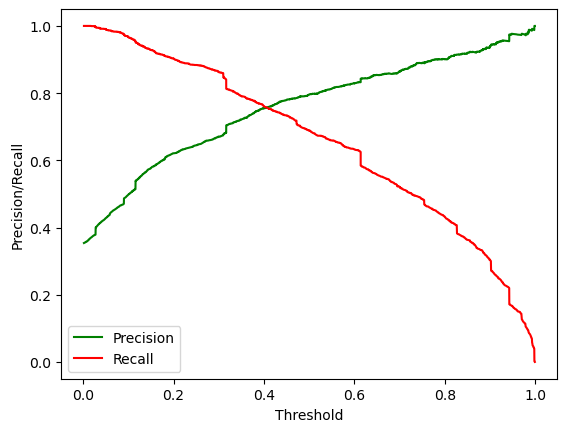

In [122]:
# plotting precision-recall tradeoff curve
plt.plot(threshold,precision[:-1],'-g', label='Precision')
plt.plot(threshold,recall[:-1],'-r', label='Recall')

plt.legend()
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.show()

Key Takeaways:

The precision-recall tradeoff value is approximately 0.4 with a balance between precision and recall.

In [123]:
y_train_pred_final.head(2)

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,0,0.027067,3884,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.129419,5176,0,1,1,0,0,0,0,0,0,0,0,0


In [124]:
# Creating new column 'Balance_Predicted' with 1 if Converted_Prob > 0.42 else 0
y_train_pred_final['Balance_Predicted'] = y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.4 else 0)

# checking head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted,Balance_Predicted
0,0,0.027067,3884,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0.129419,5176,0,1,1,0,0,0,0,0,0,0,0,0,0
2,1,0.988175,7327,1,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.041555,3331,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0.613735,1216,1,1,1,1,1,1,1,1,0,0,0,1,1


In [125]:
confusion3=confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Balance_Predicted)
confusion3

array([[3146,  493],
       [ 477, 1519]], dtype=int64)

In [126]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.Balance_Predicted)

0.7549701789264414

In [127]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.Balance_Predicted)

0.7610220440881763

Key Takeaways:

Sensitivity, Recall values are 76% approximately but the Business has asked for 80%. 
Using Sensitivity -Specificity threshold of 0.34 we will get above 80% metrics.


In [128]:
#Adding Lead Score Feature to Training dataframe 

y_train_pred_final['Lead_Score'] = y_train_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted,Balance_Predicted,Lead_Score
0,0,0.027067,3884,0,1,0,0,0,0,0,0,0,0,0,0,0,3
1,0,0.129419,5176,0,1,1,0,0,0,0,0,0,0,0,0,0,13
2,1,0.988175,7327,1,1,1,1,1,1,1,1,1,1,1,1,1,99
3,0,0.041555,3331,0,1,0,0,0,0,0,0,0,0,0,0,0,4
4,0,0.613735,1216,1,1,1,1,1,1,1,1,0,0,0,1,1,61


### Making predictions on the Test dataset

#### Feature Scaling the test dataset

In [129]:
X_test.select_dtypes(include=['int64','float64']).columns

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Free_copy'],
      dtype='object')

In [130]:
cols

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Specialization_Others',
       'Current_occupation_Other', 'Current_occupation_Working Professional'],
      dtype='object')

In [131]:
#Scaling the numerical features of test dataset using Standard Scaling
num_cols=['Do Not Email', 'TotalVisits', 'Total Time Spent on Website','Page Views Per Visit', 'Free_copy']
X_test[num_cols] = Scaler.transform(X_test[num_cols])
X_test = X_test[cols]

In [132]:
X_test.head(3)

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Specialization_Others,Current_occupation_Other,Current_occupation_Working Professional
901,2.189372,1,0,0,0,0,0,0,1,0,0,0
1780,0.336576,0,1,0,0,1,0,0,0,0,0,0
6185,-0.845381,0,0,1,0,0,1,0,0,1,1,0


#### Predicting using final model on Test Dataset 

In [133]:
# Adding contant value
X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

(2415, 13)

In [134]:
# Making prediction on test dataset using final model (i.e. model no.4)
y_test_pred = res.predict(X_test_sm)
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head(3)

,0
901,0.901058
1780,0.970254
6185,0.027067


In [135]:
# Making a dataframe of y_test dataset
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
901,1
1780,1
6185,0
5411,1
7368,0


In [136]:
# Creating index as a ID column 
y_test_df['Prospect ID'] = y_test_df.index
y_test_df.head(2)

,Converted,Prospect ID
901,1,901
1780,1,1780


In [137]:
# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [138]:
# Creating a final dataset of combining y_test_df and y_test_pred
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head(3)

,Converted,Prospect ID,0
0,1,901,0.901058
1,1,1780,0.970254
2,0,6185,0.027067


In [139]:
# Renaming the '0' column
y_pred_final = y_pred_final.rename(columns={0: 'Converted_Prob'})

In [140]:
# Rearranging all the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)
y_pred_final.head(2)

,Prospect ID,Converted,Converted_Prob
0,901,1,0.901058
1,1780,1,0.970254


In [141]:
# Using Cutoff of 0.34 by sensitivity-specificity method and Creating Final_Predicted value for test dataset
y_pred_final['Final_Predicted'] = y_pred_final['Converted_Prob'].map(lambda x : 1 if x > 0.34 else 0)
y_pred_final.head(2)

,Prospect ID,Converted,Converted_Prob,Final_Predicted
0,901,1,0.901058,1
1,1780,1,0.970254,1


In [142]:
y_pred_final.reset_index()

,index,Prospect ID,Converted,Converted_Prob,Final_Predicted
0,0,901,1,0.901058,1
1,1,1780,1,0.970254,1
2,2,6185,0,0.027067,0
3,3,5411,1,0.459517,1
4,4,7368,0,0.027067,0
...,...,...,...,...,...
2410,2410,6514,0,0.322263,0
2411,2411,7611,0,0.094120,0
2412,2412,2461,1,0.942366,1
2413,2413,5768,1,0.362472,1


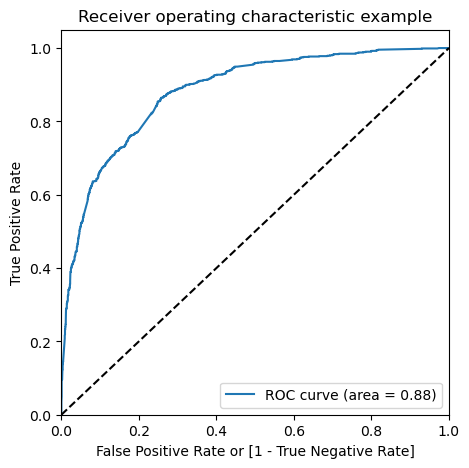

In [143]:
# ROC Curve for test dataset
fpr , tpr , thresholds = metrics.roc_curve(y_pred_final['Converted'],y_pred_final['Converted_Prob'],drop_intermediate= False)
draw_roc(y_pred_final['Converted'],y_pred_final['Converted_Prob'])

Key Takeaways:

Area under the curve for test dataset is 0.88.

#### Model Evaluation on Test Dataset

In [144]:
# Checking accuracy on Test Dataset
metrics.accuracy_score(y_pred_final['Converted'],y_pred_final['Final_Predicted'])

0.798343685300207

In [145]:
confusion_test = metrics.confusion_matrix(y_pred_final['Converted'],y_pred_final['Final_Predicted'])
confusion_test

array([[1238,  269],
       [ 218,  690]], dtype=int64)

In [146]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [147]:
#Sensitivity
TP/float(TP+FN)

0.7599118942731278

In [148]:
#Specificity
TN/ float(TN+FP)

0.8214996682149966

In [150]:
res.params.sort_values(ascending=False)

Lead Origin_Lead Add Form                  3.595028
Current_occupation_Working Professional    2.675383
Last Activity_SMS Sent                     1.974016
Lead Source_Olark Chat                     1.263781
Total Time Spent on Website                1.072192
Last Activity_Others                       1.015430
Last Activity_Email Opened                 0.739538
Specialization_Others                     -0.657774
Last Activity_Olark Chat Conversation     -0.805813
Lead Origin_Landing Page Submission       -0.901833
const                                     -1.210571
Current_occupation_Other                  -1.265202
Last Activity_Email Bounced               -1.676832
dtype: float64

### Adding Lead Score column to Test dataframe

In [151]:
# Adding Lead Score 

y_pred_final['Lead_Score'] = y_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,Final_Predicted,Lead_Score
0,901,1,0.901058,1,90
1,1780,1,0.970254,1,97
2,6185,0,0.027067,0,3
3,5411,1,0.459517,1,46
4,7368,0,0.027067,0,3


### Final Conclusion:
**Evaluation Metrics:**

Train set :
- Accuracy -> 81.7%
- Sensitivity-> 79.9%
- Specificity-> 82.7%

For Test set
- Accuracy : 79.8%
- Sensitivity : 75.99%
- Specificity : 82.15%

Evaluation metrics in both test and train dataset are consistent. Therefore final model is performing good.

**Top 3 features contributing to predicting hot leads are:**
- Lead Origin_Lead Add Form
- Current_occupation_Working Professional
- Last Activity_SMS Sent


### Recommendations:
1. Top three variables in model which contribute most towards the probability of a lead getting converted are:
- Lead Origin
- Current_occupation
- Last Activity

2. Top 3 categorical/dummy variables in the model which should be focused the most on in order to increase the probability of lead conversion are :
- Lead Origin of Lead Add Form
- Working Professional as occupation
- If the last activity by Customer was SMS sending

3. Areas of improvement are Specialization-Others ,Last Activity of Olark Chat conversation Last Activity where email bounced